# Logistic Regression — Diabetes Dataset
This notebook fulfills all tasks listed in **Logistic Regression.docx**: EDA, preprocessing, model, evaluation, interpretation, and a Streamlit deployment script.

## 1. Data Exploration (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"/mnt/data/diabetes (2).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Types and summary
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Visualizations: Histograms & Boxplots

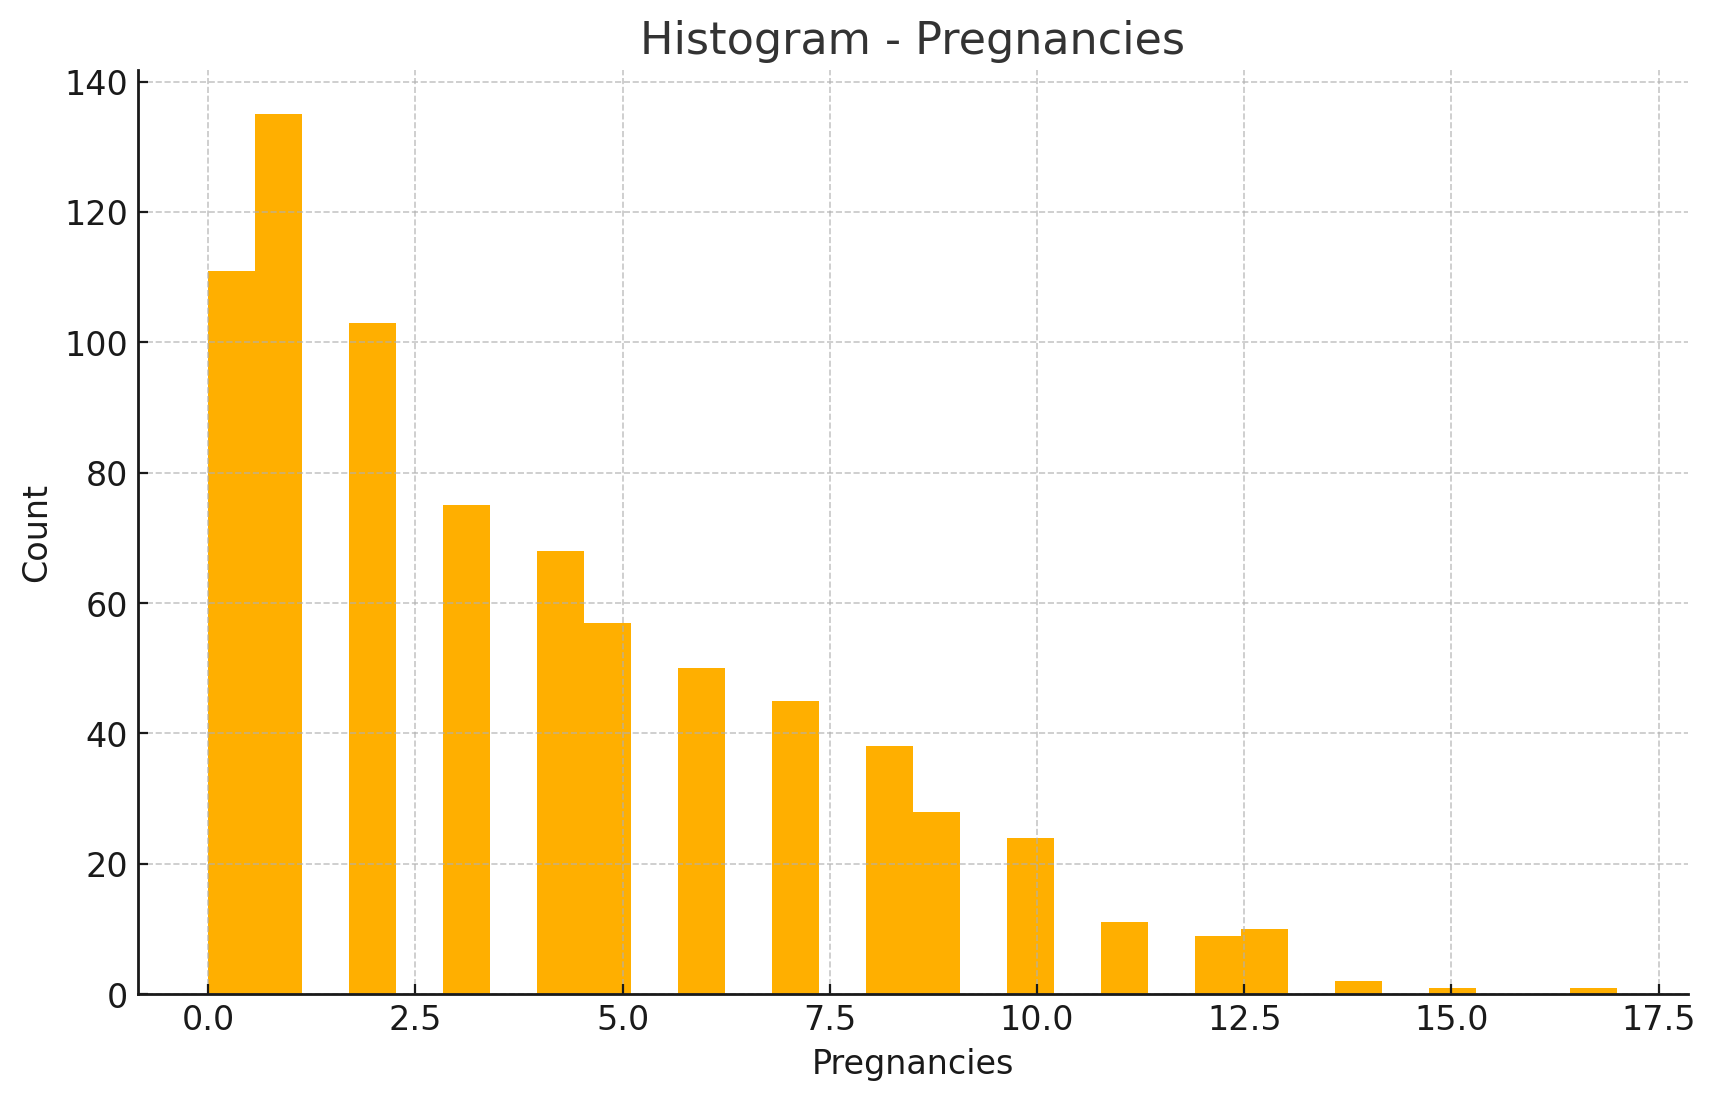

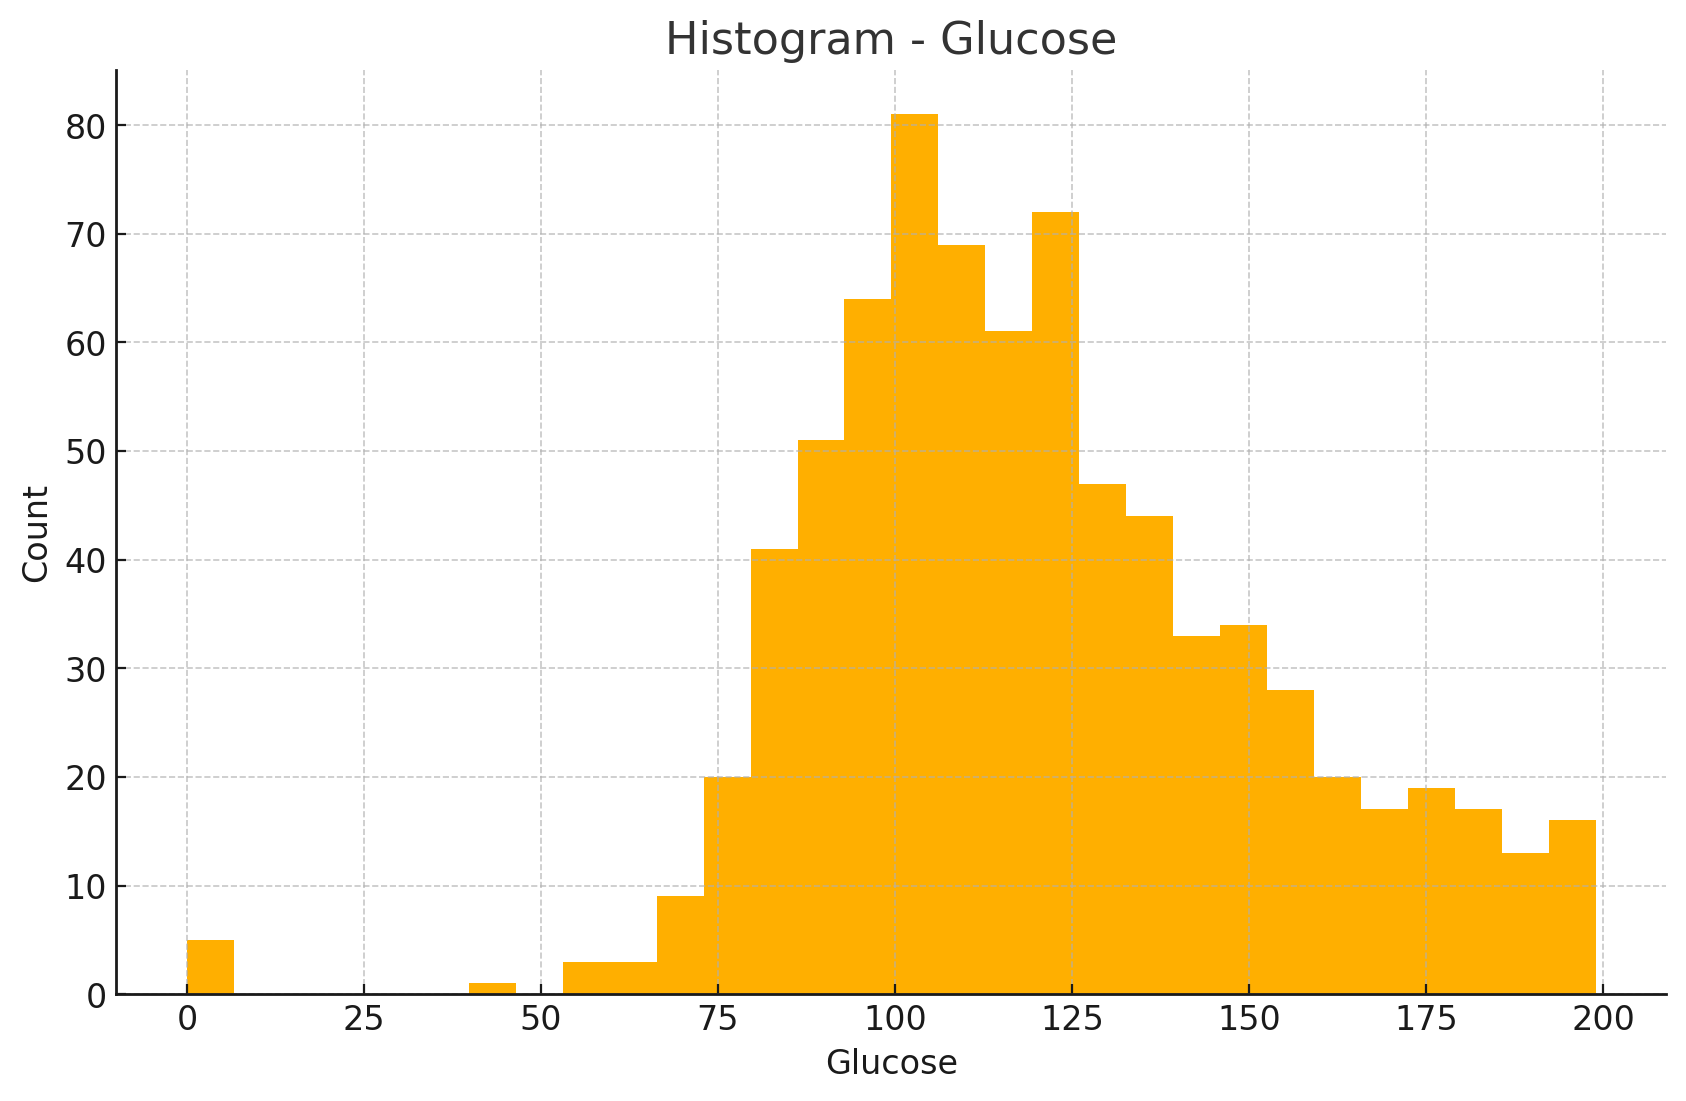

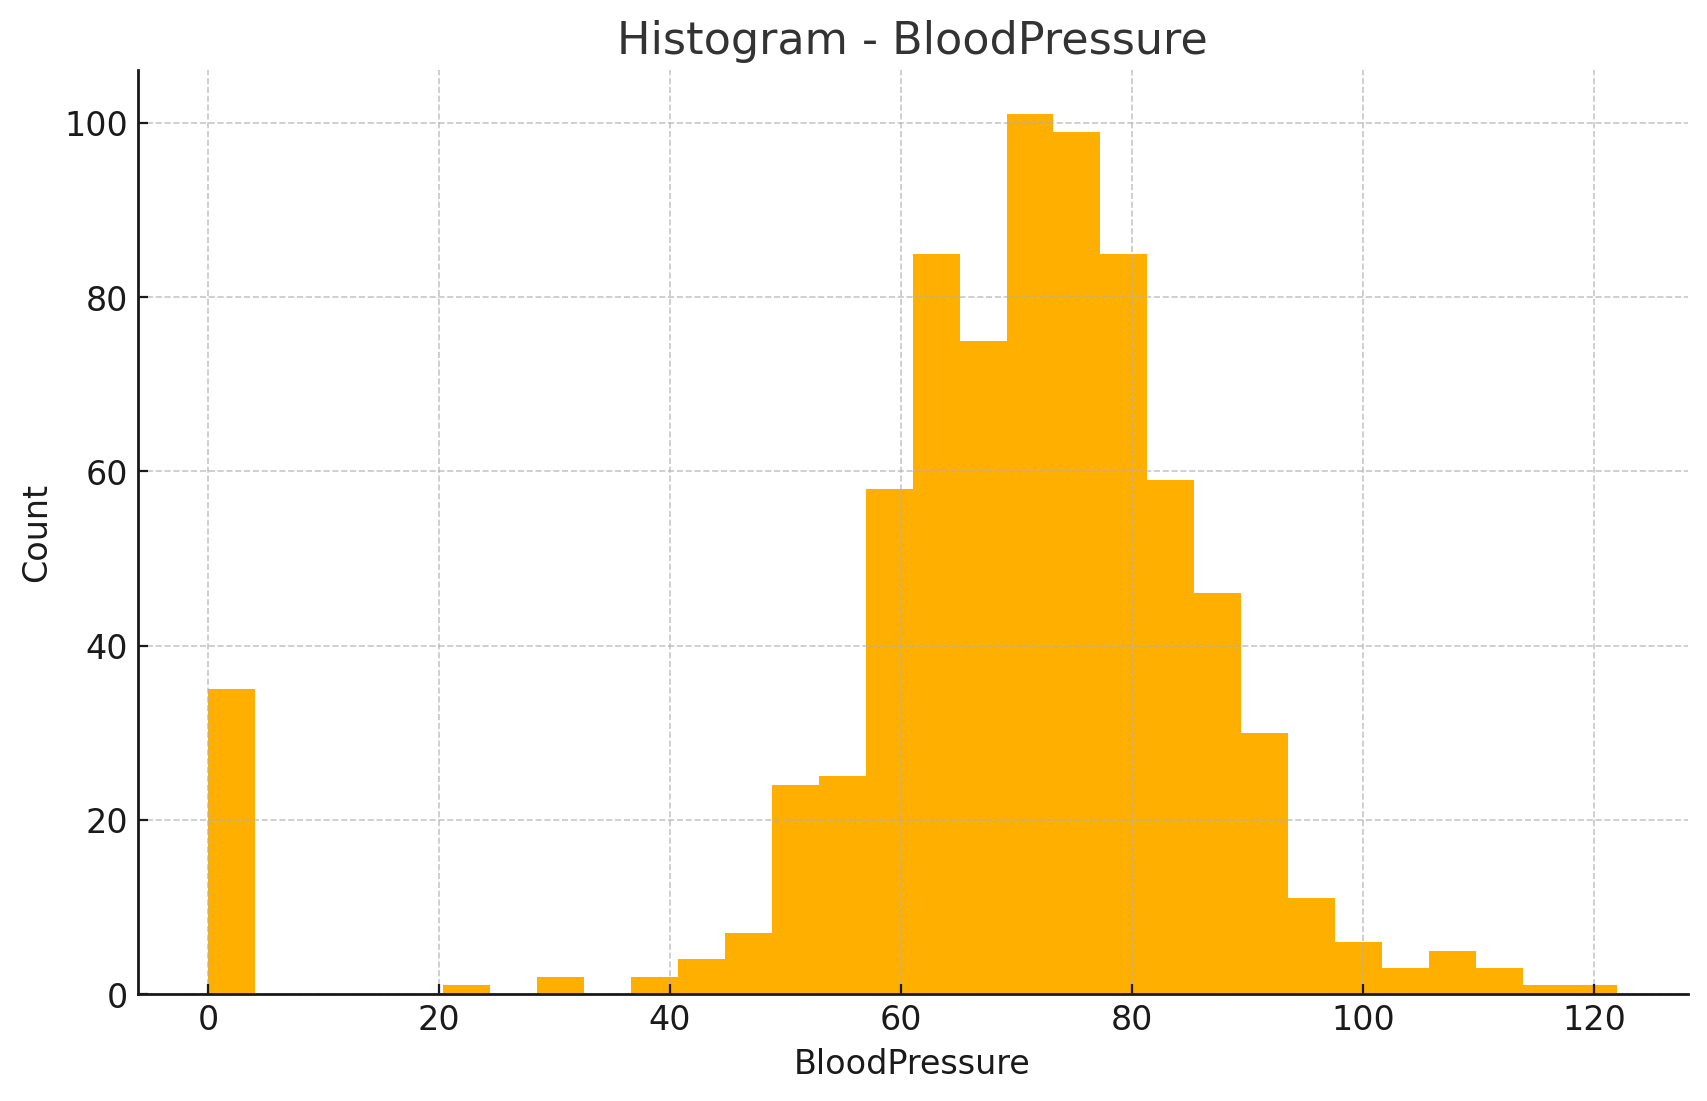

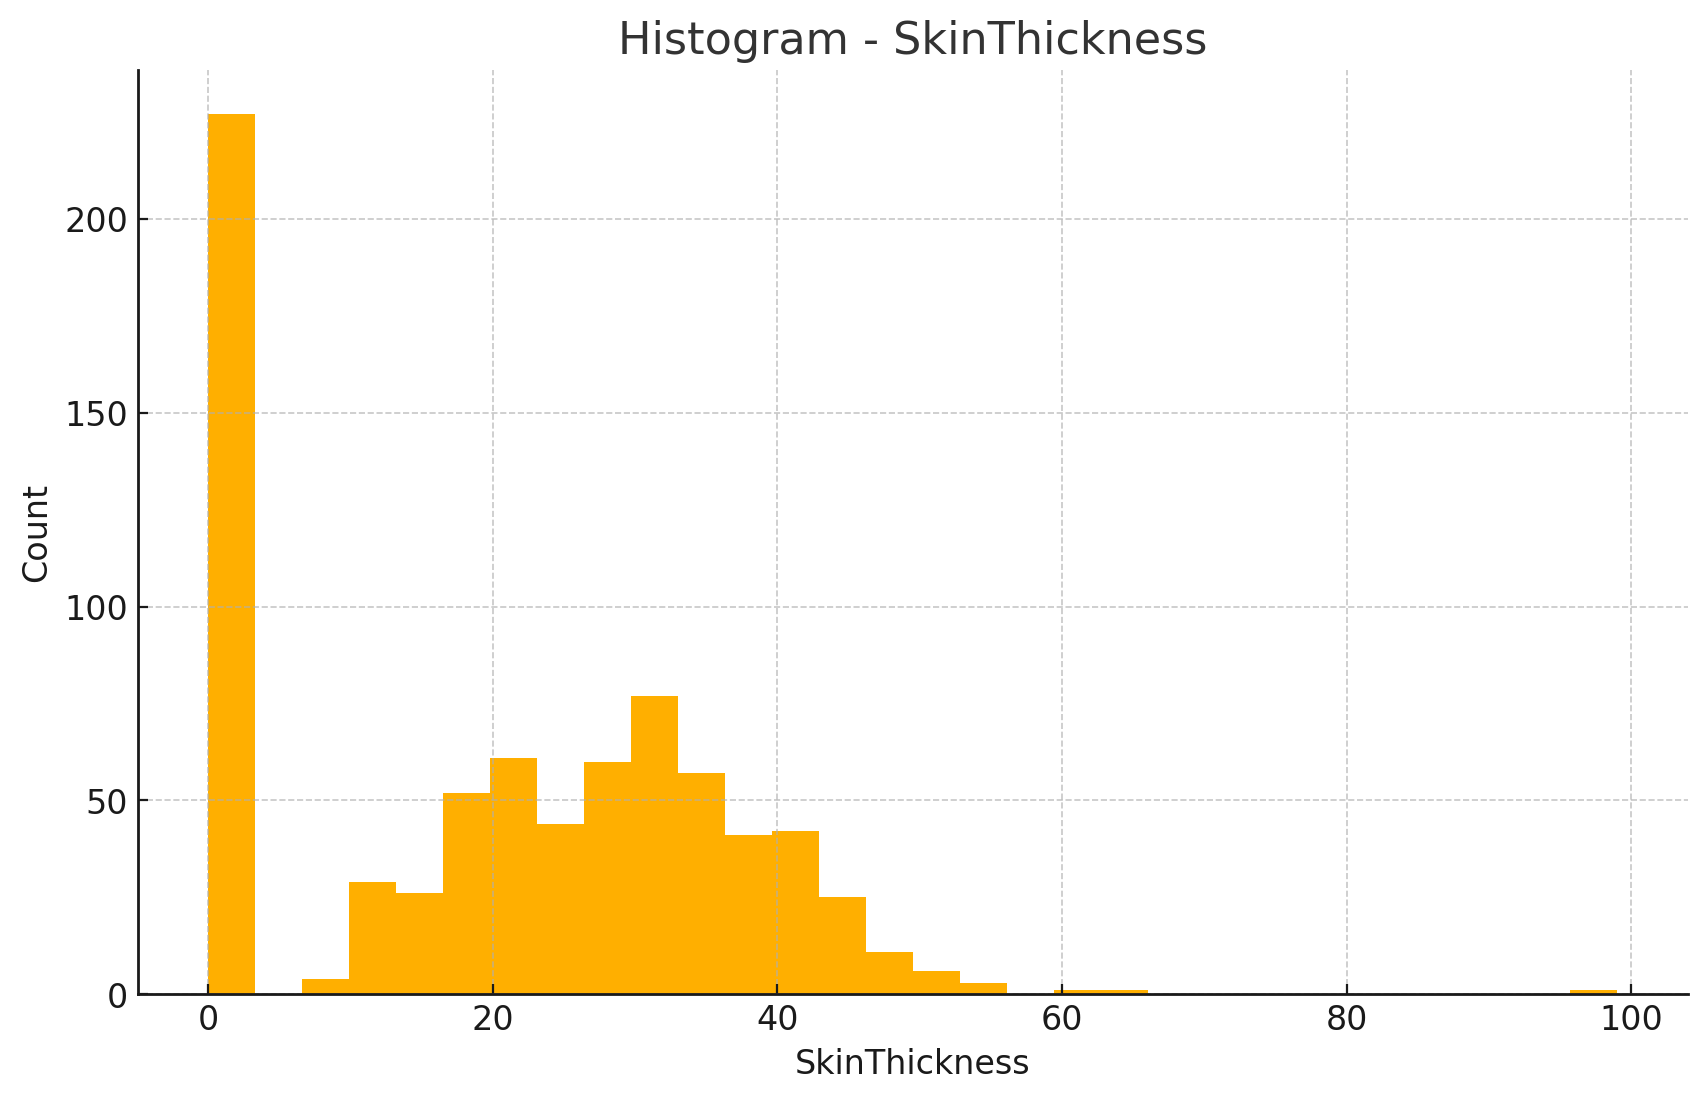

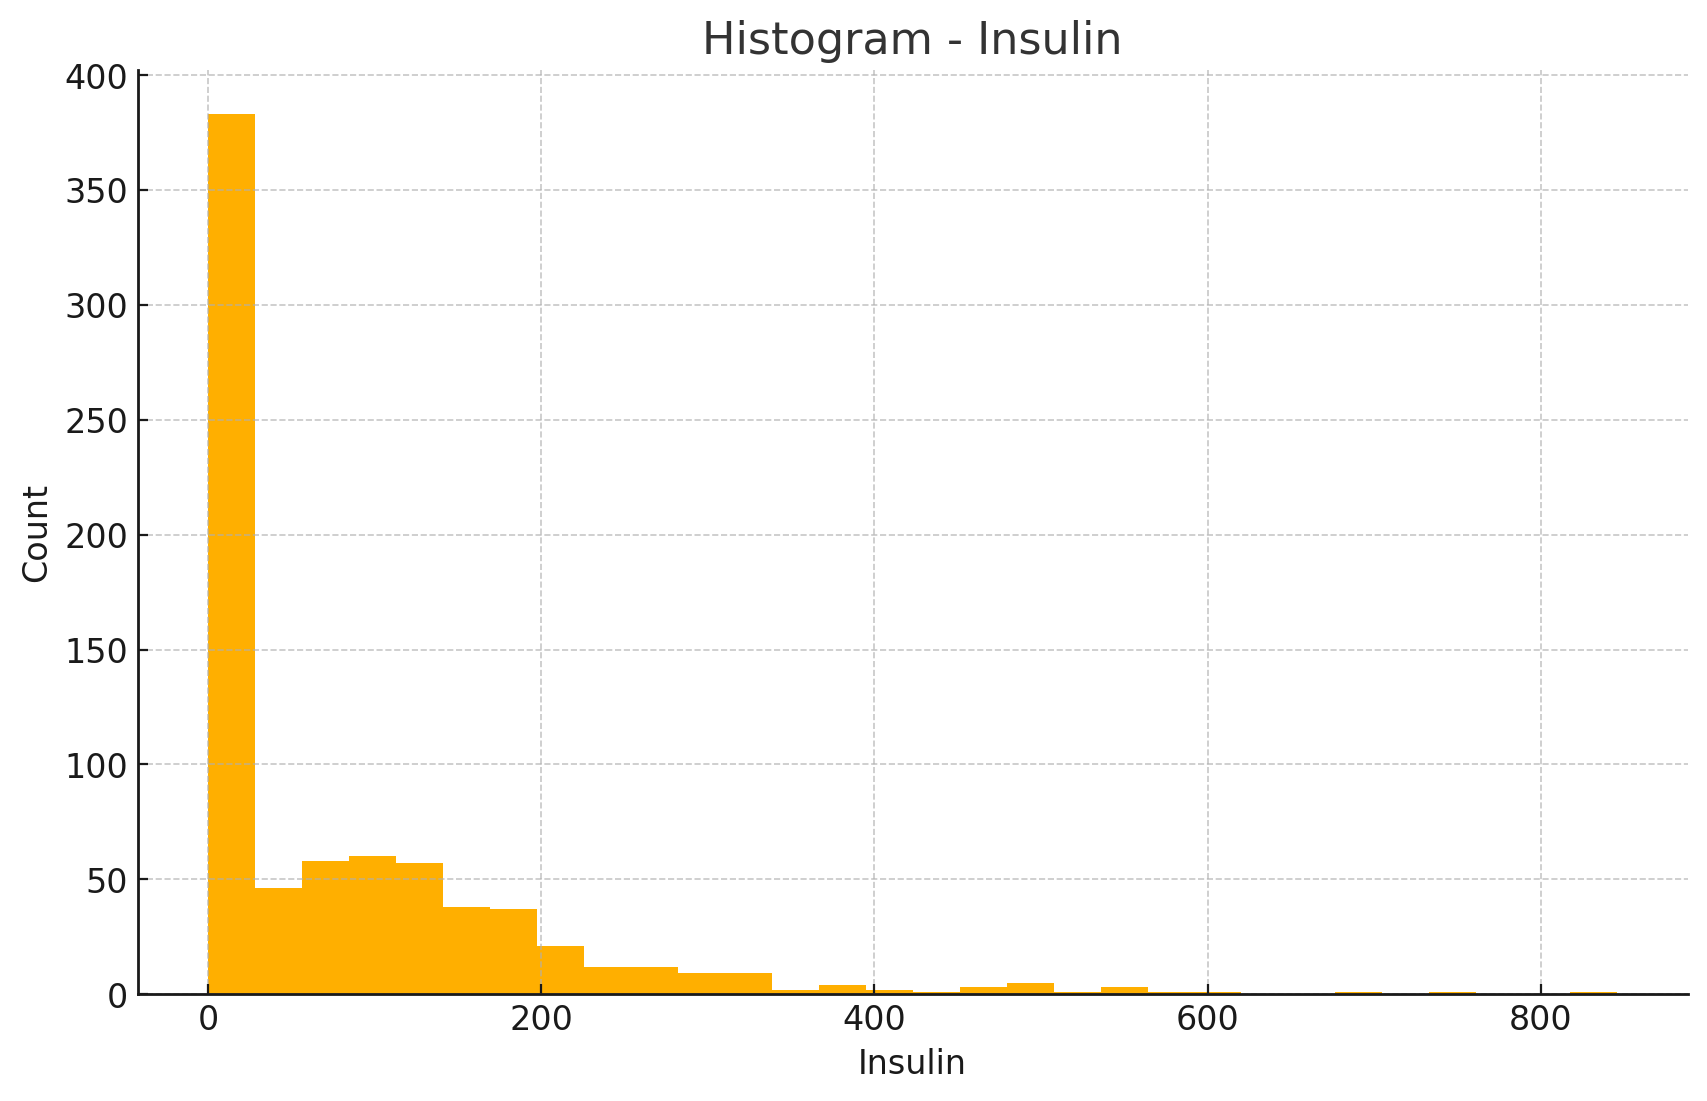

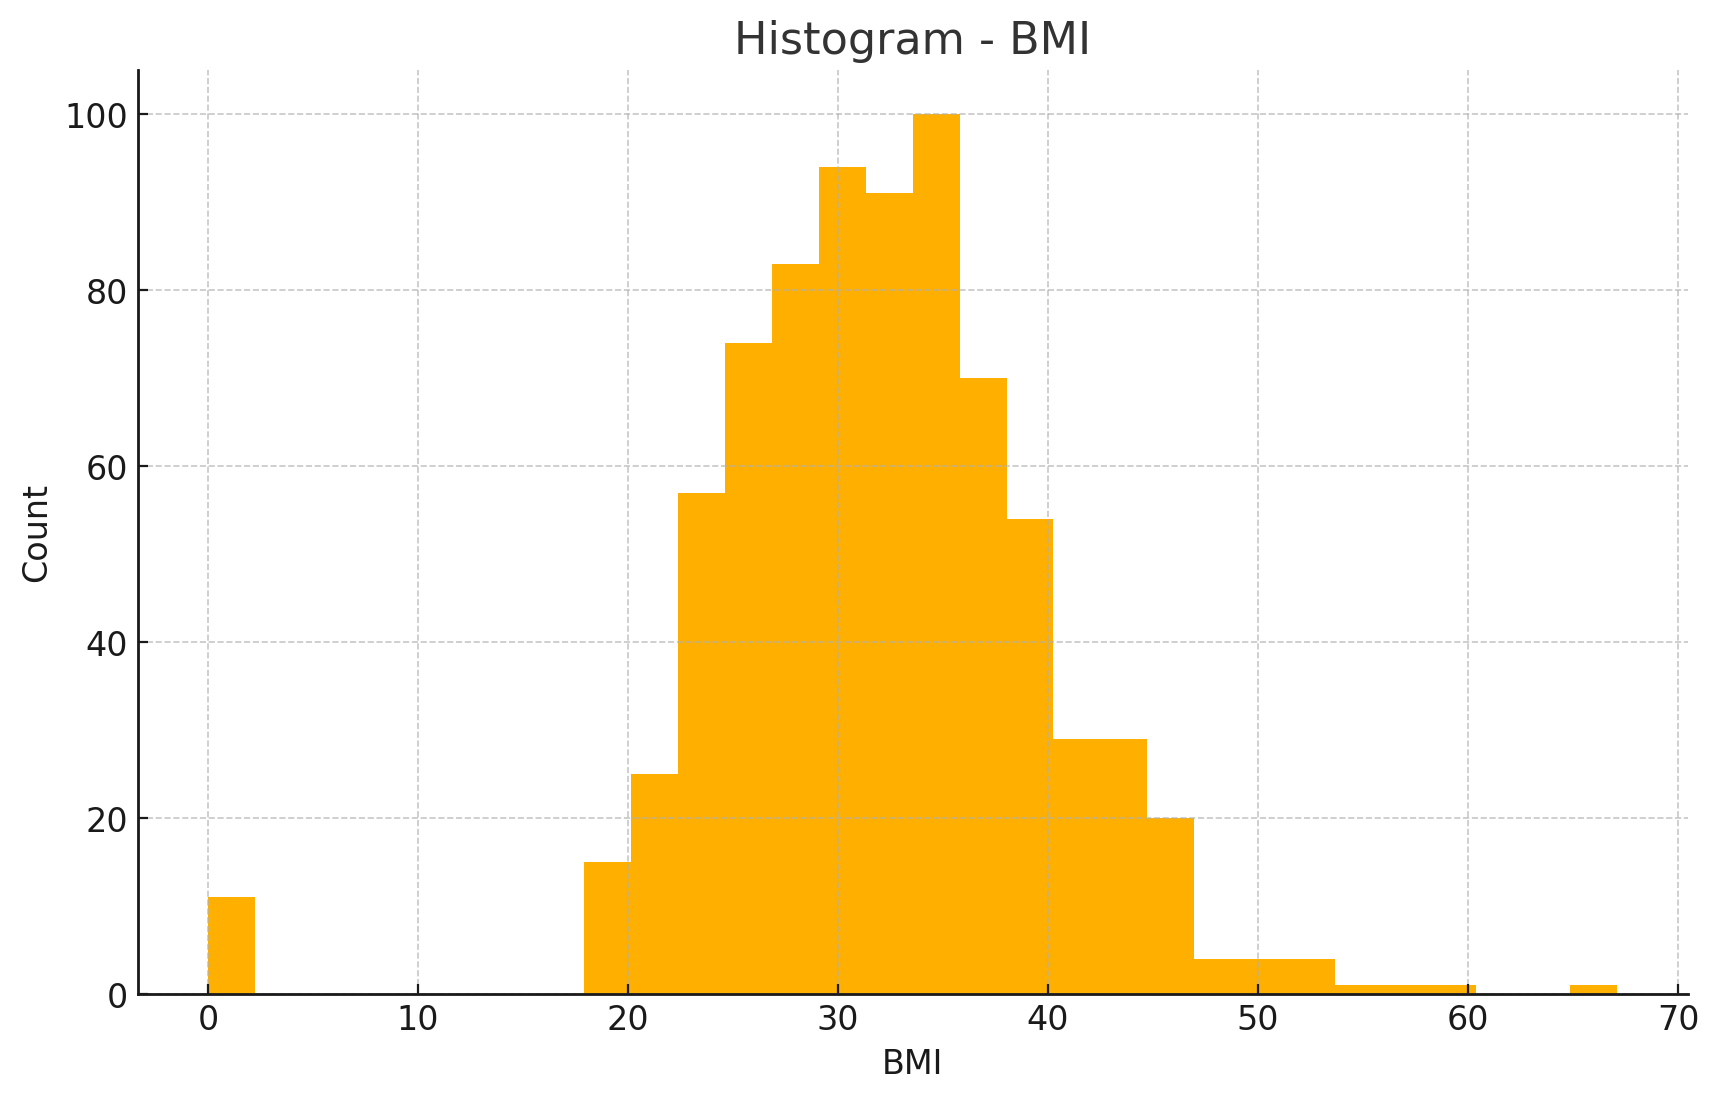

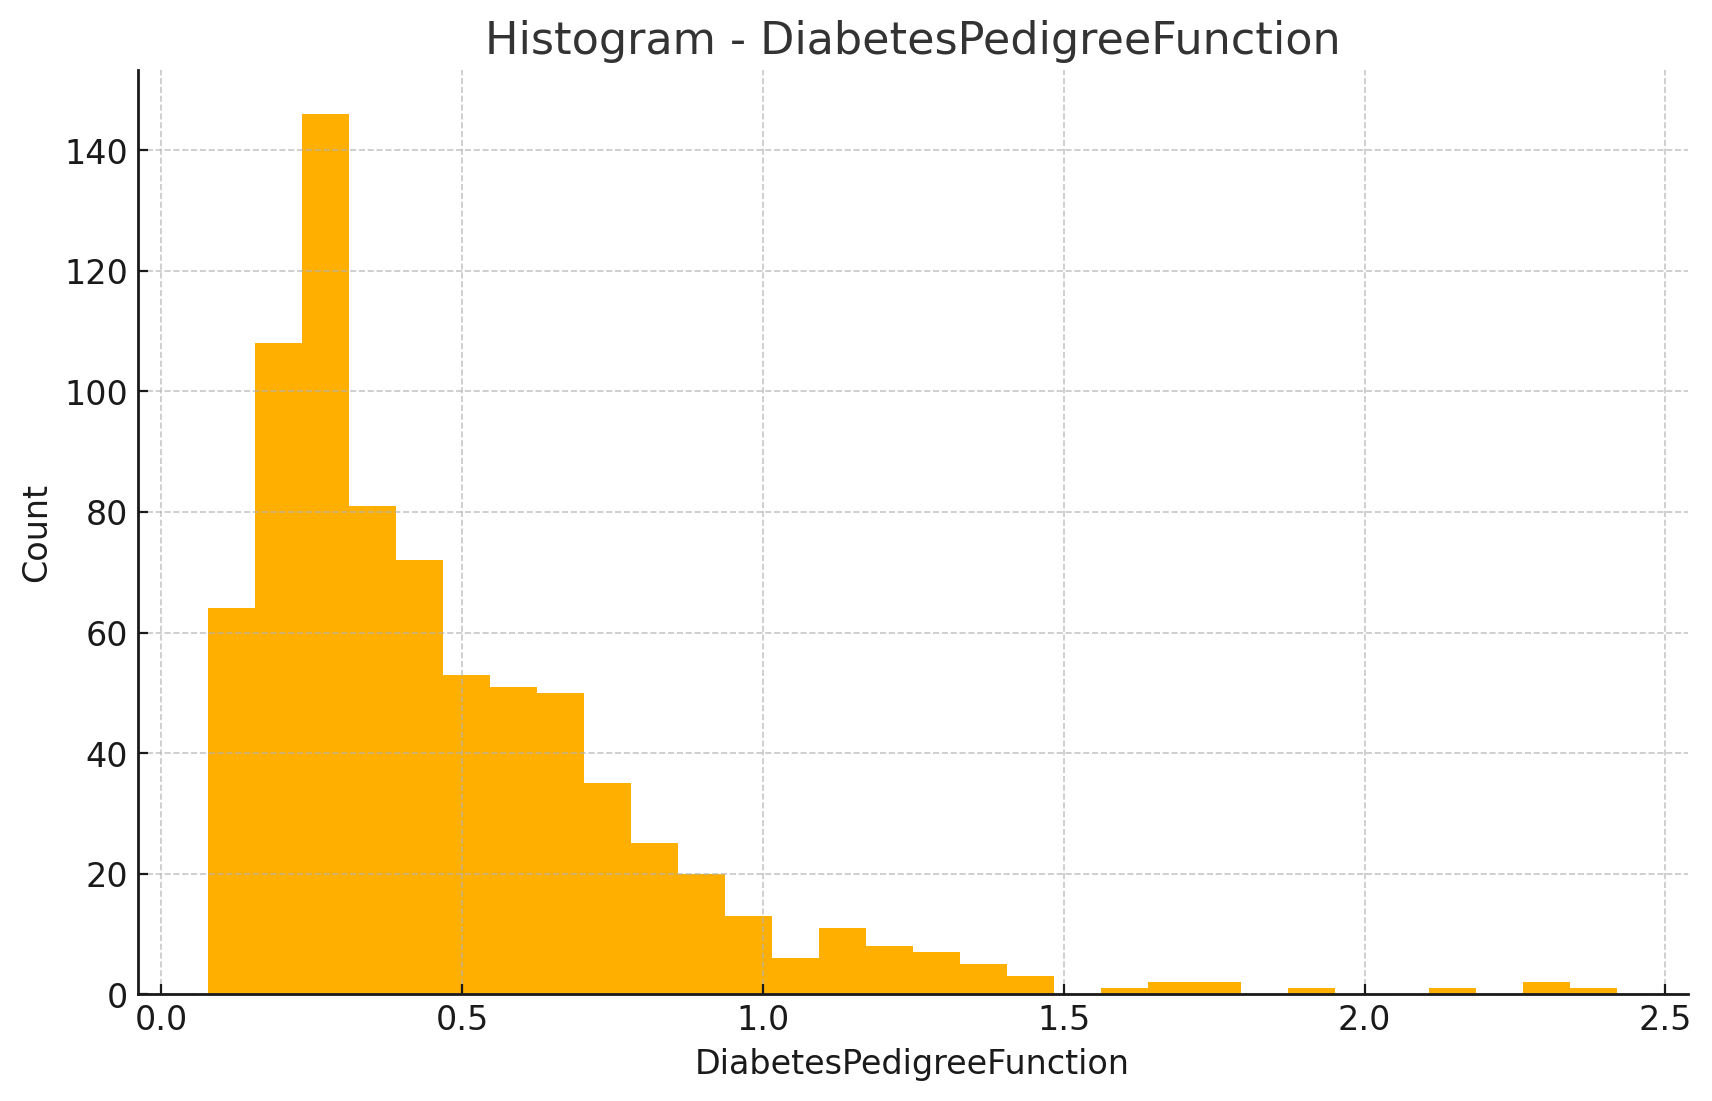

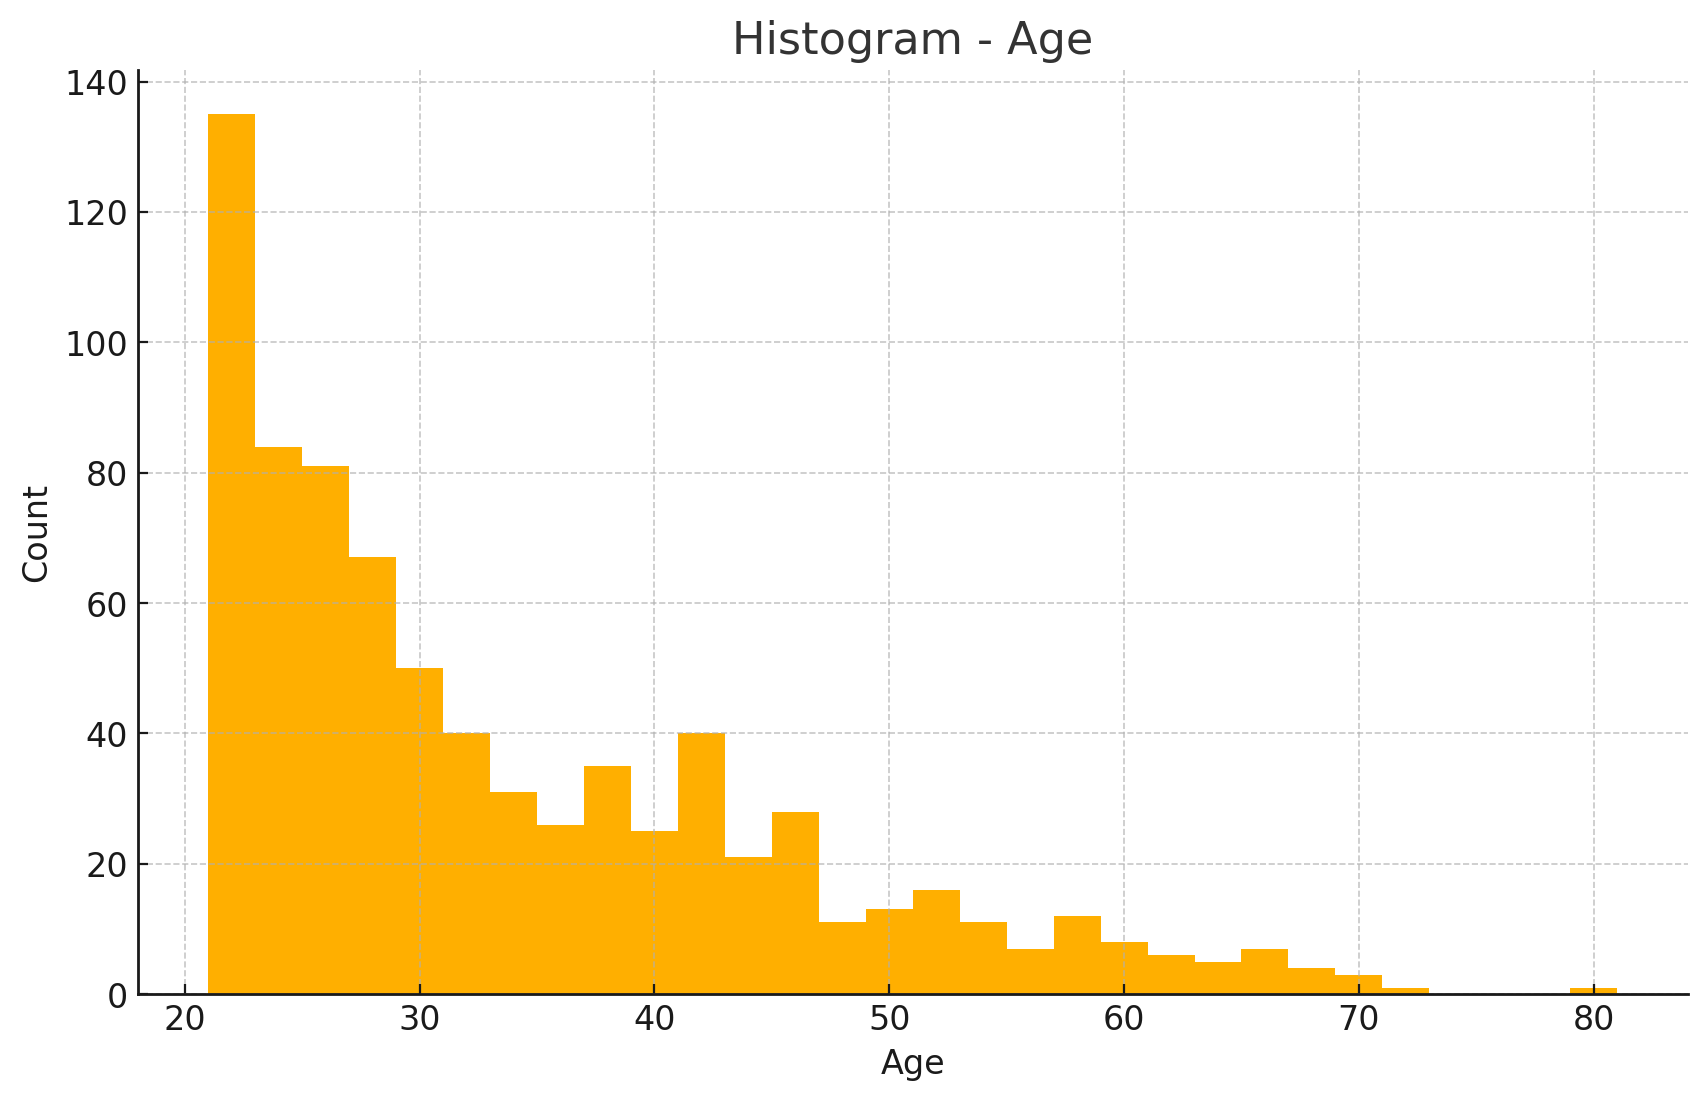

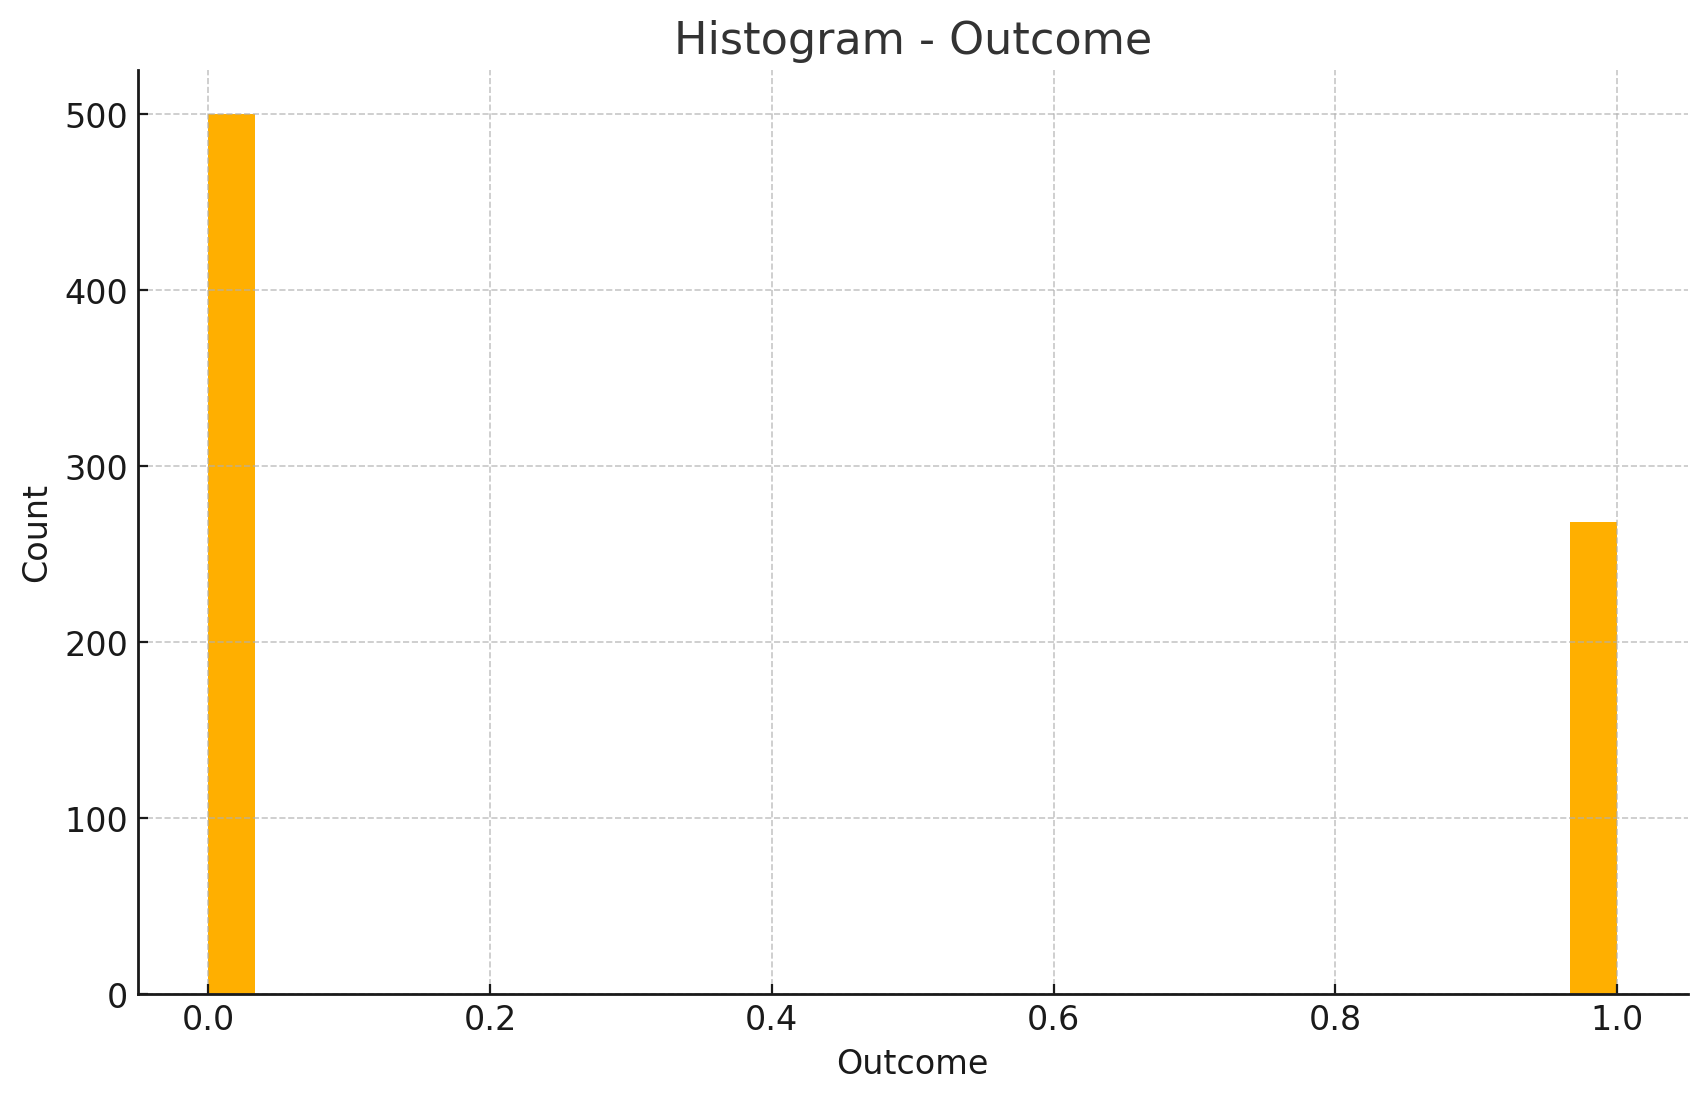

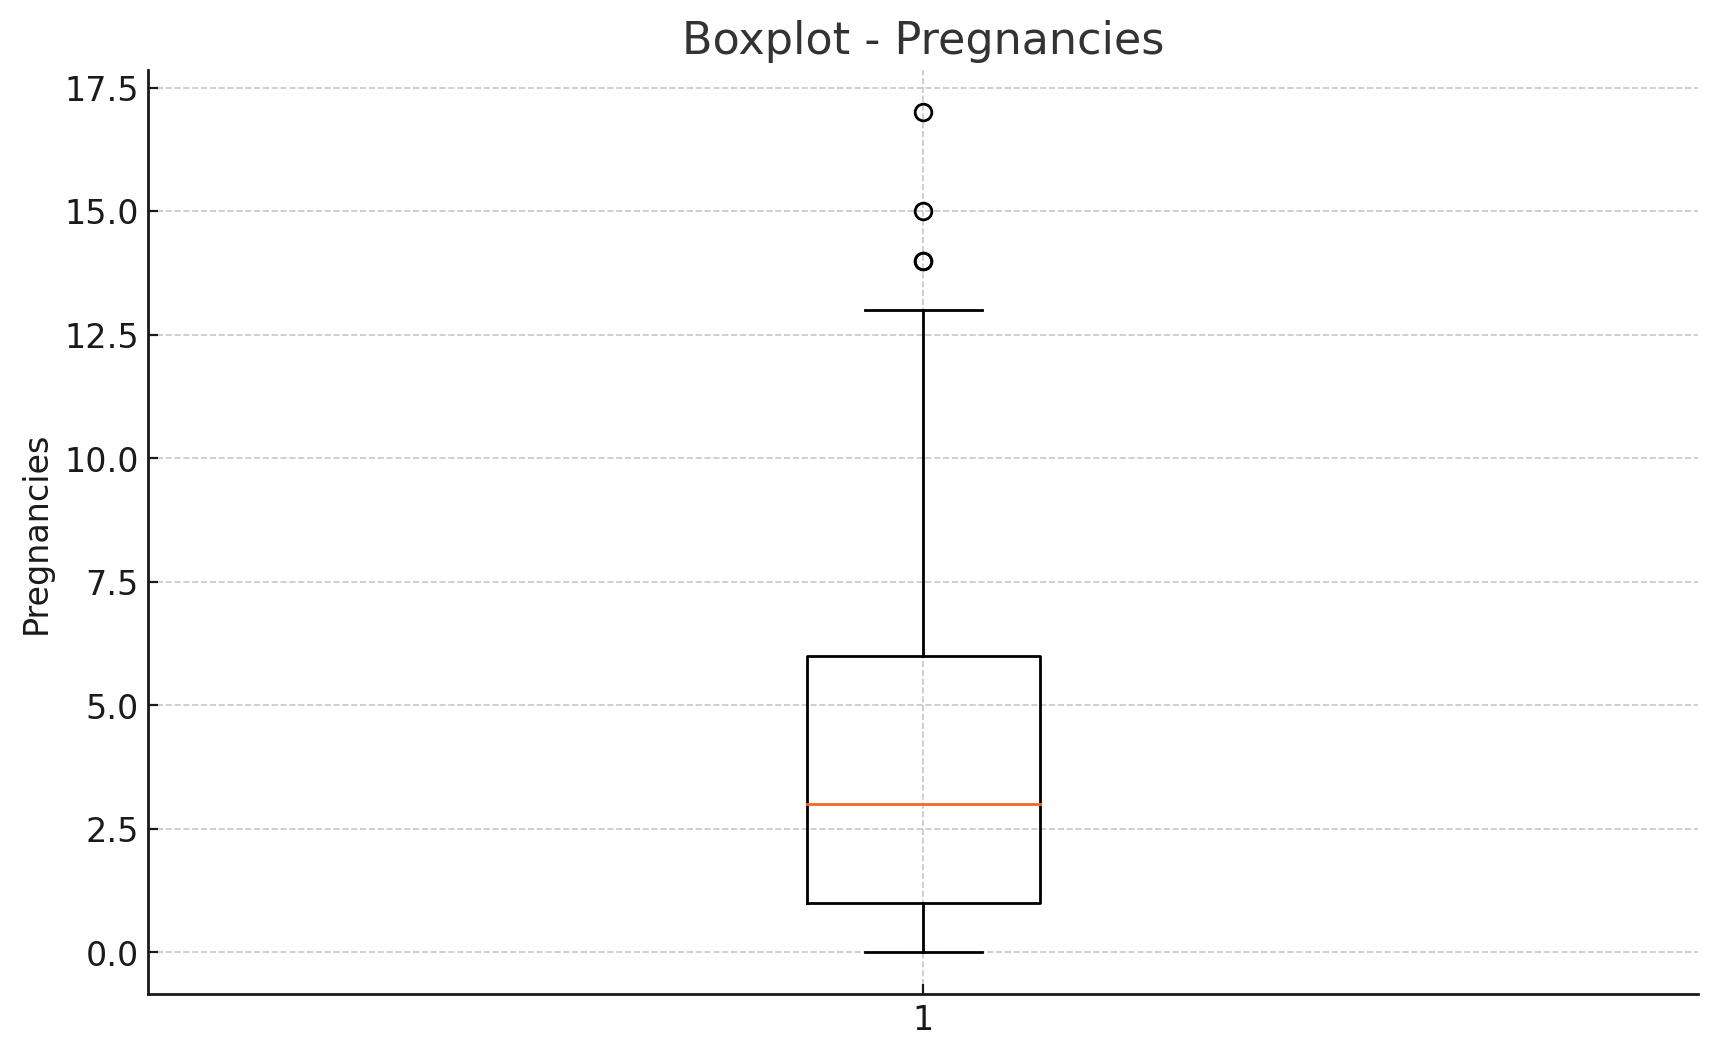

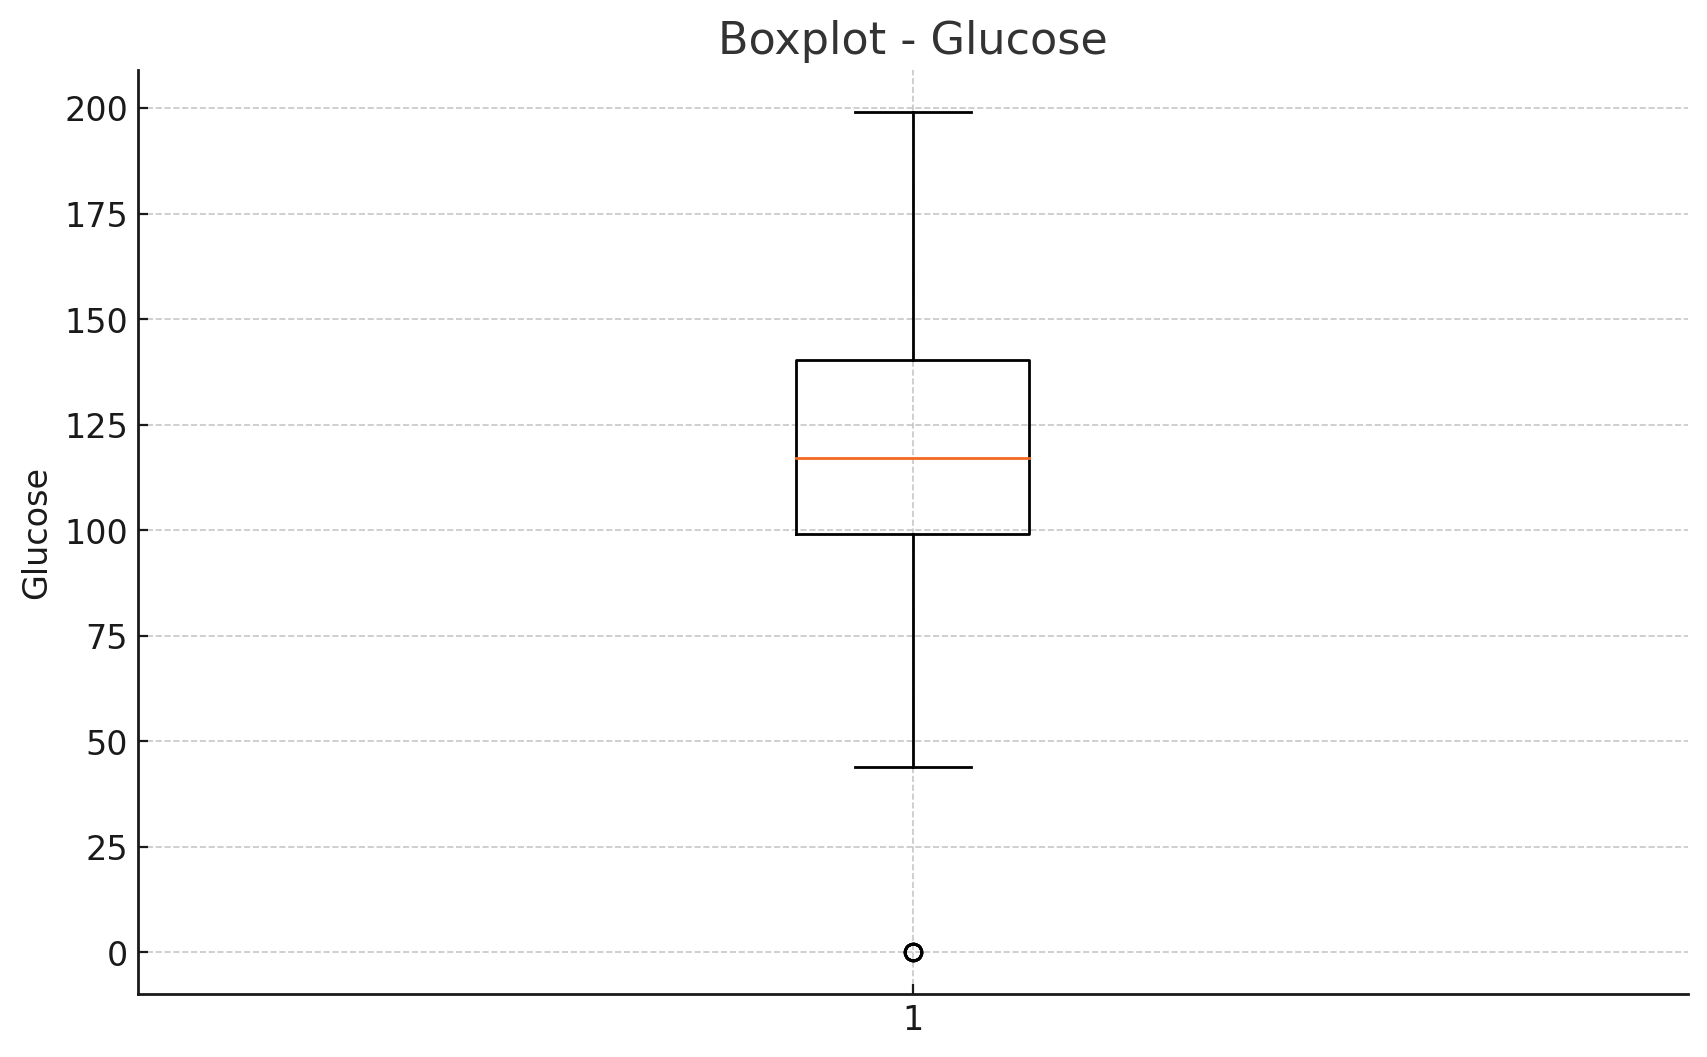

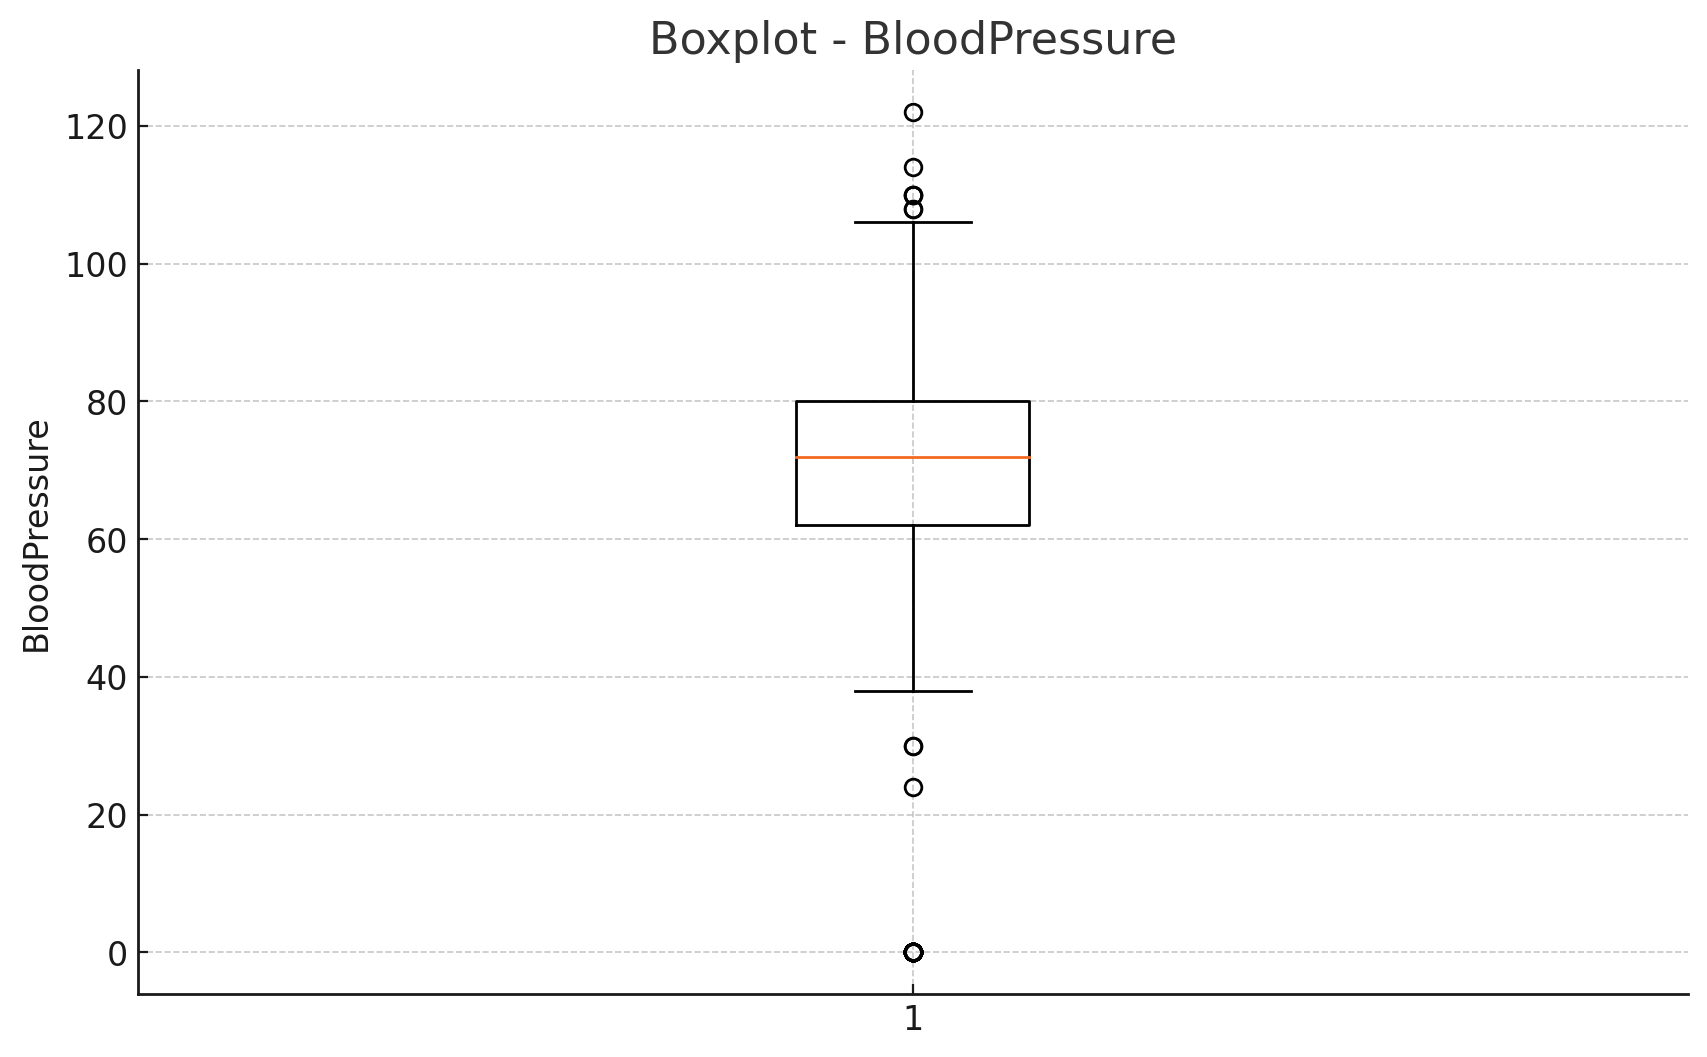

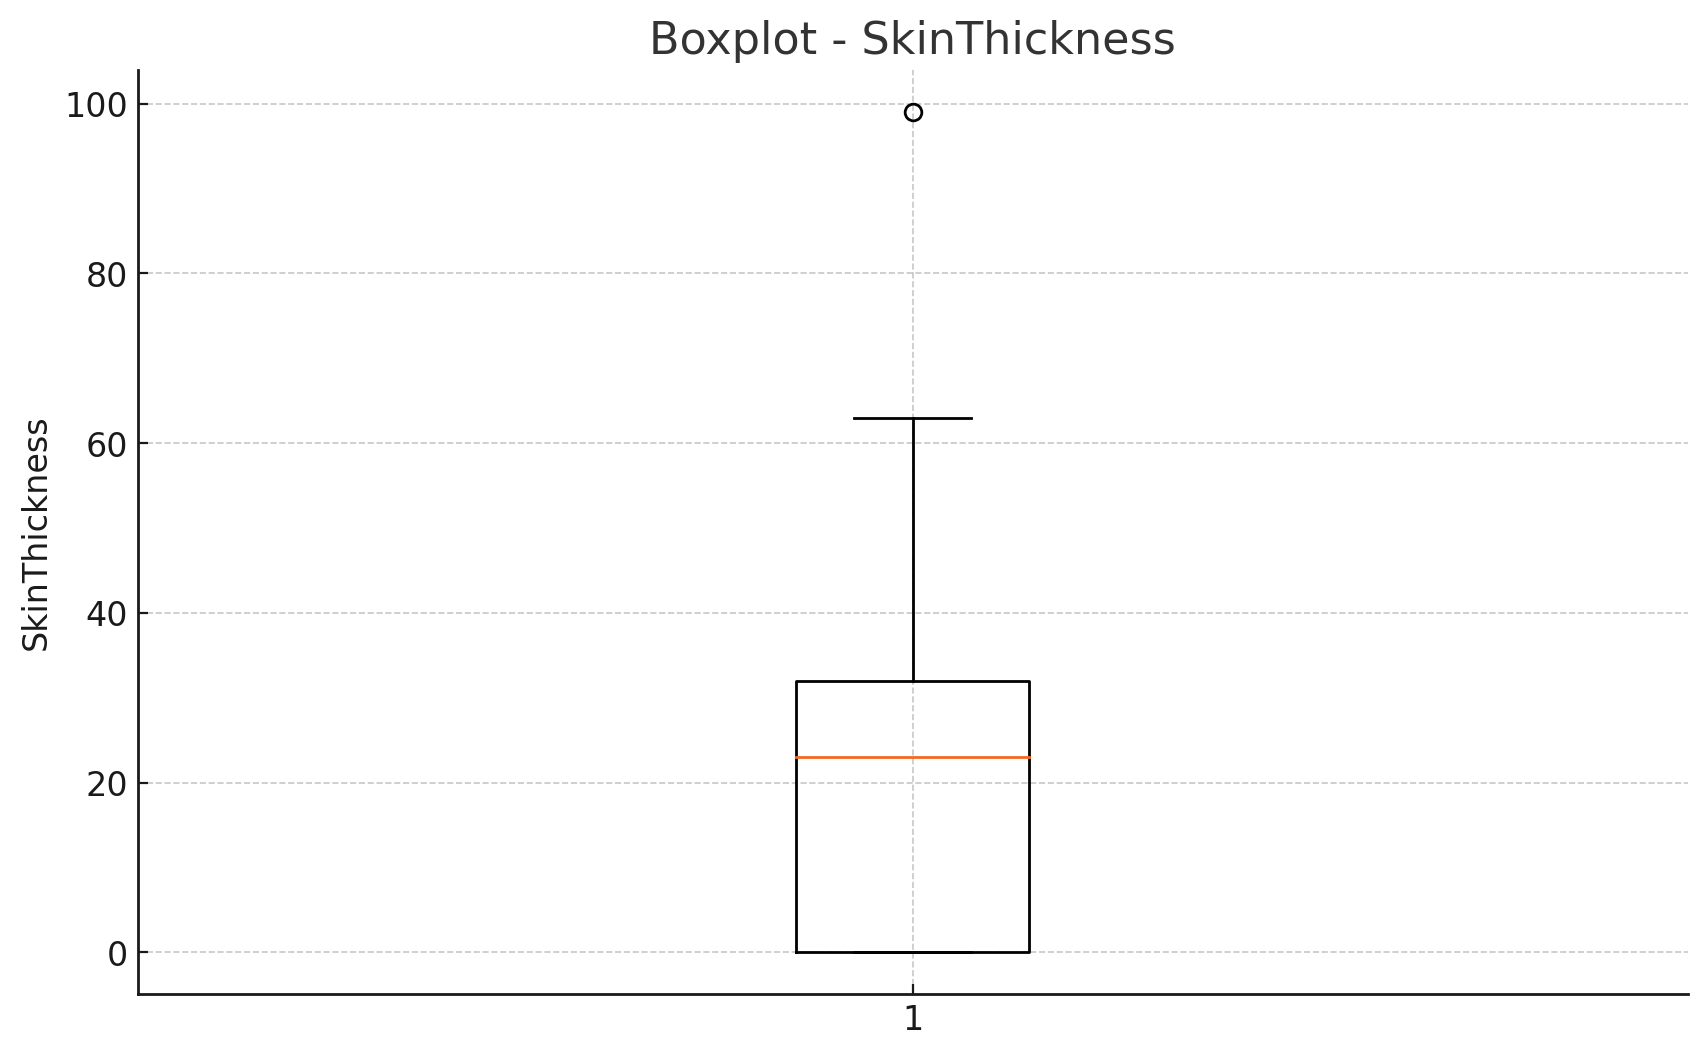

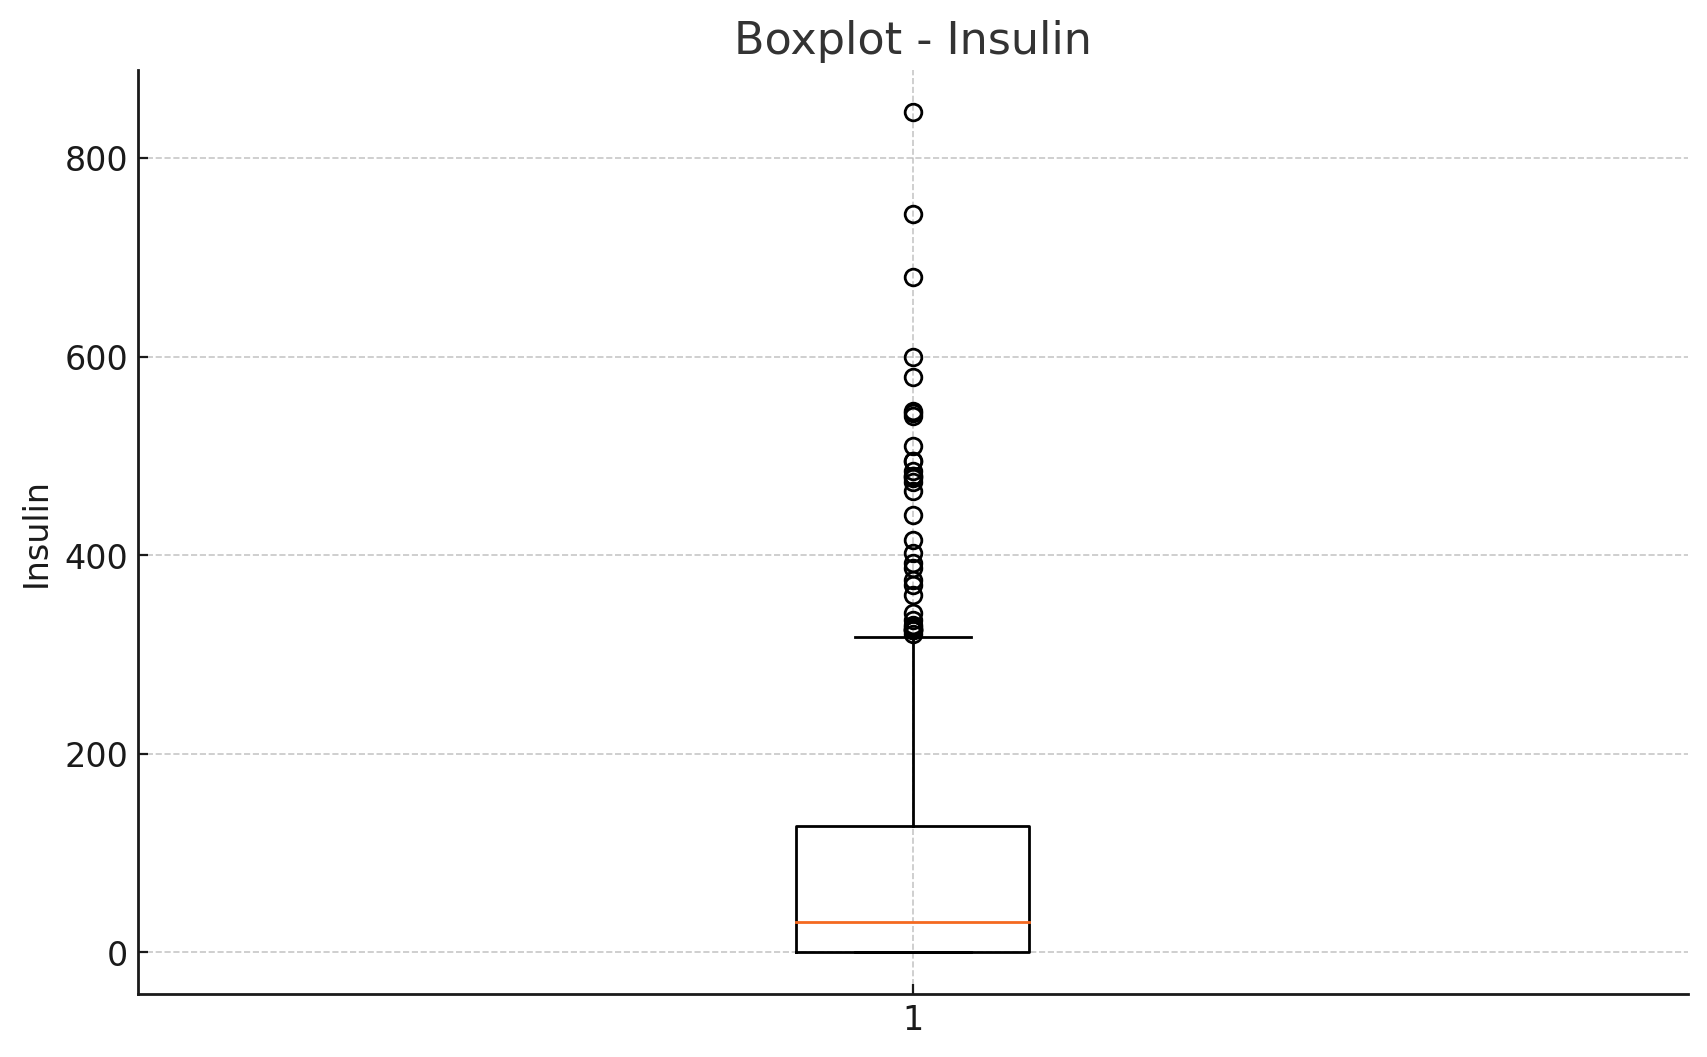

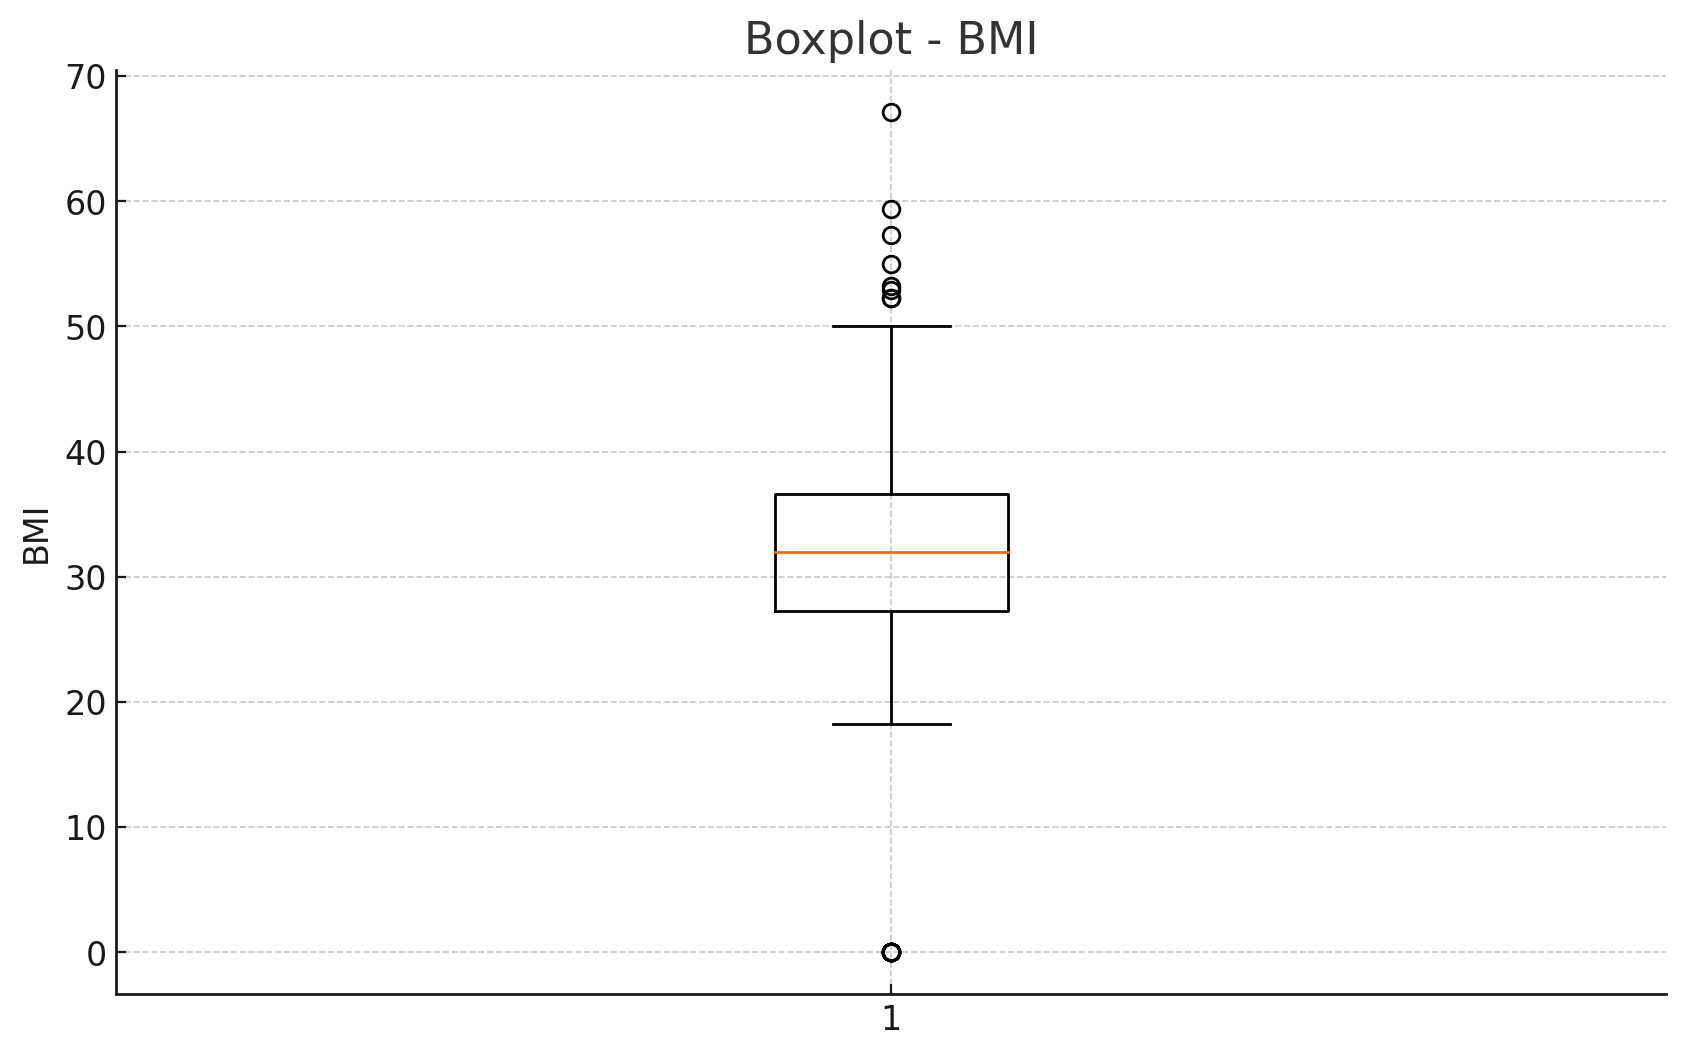

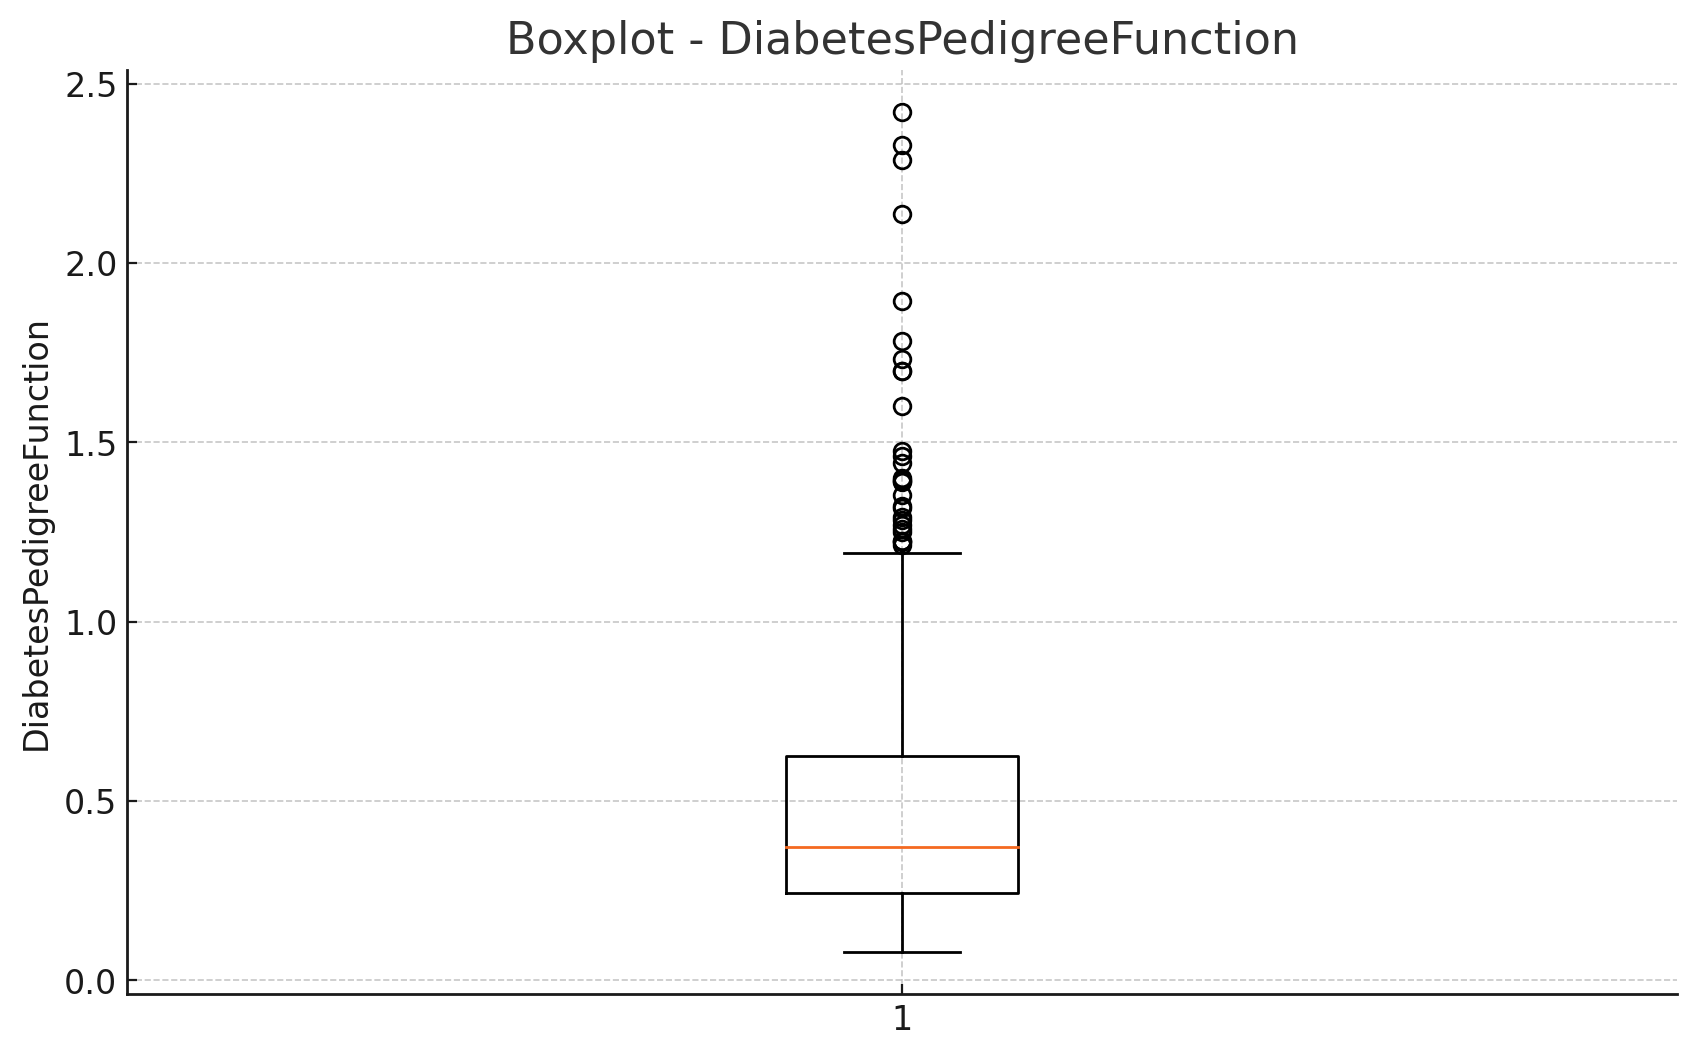

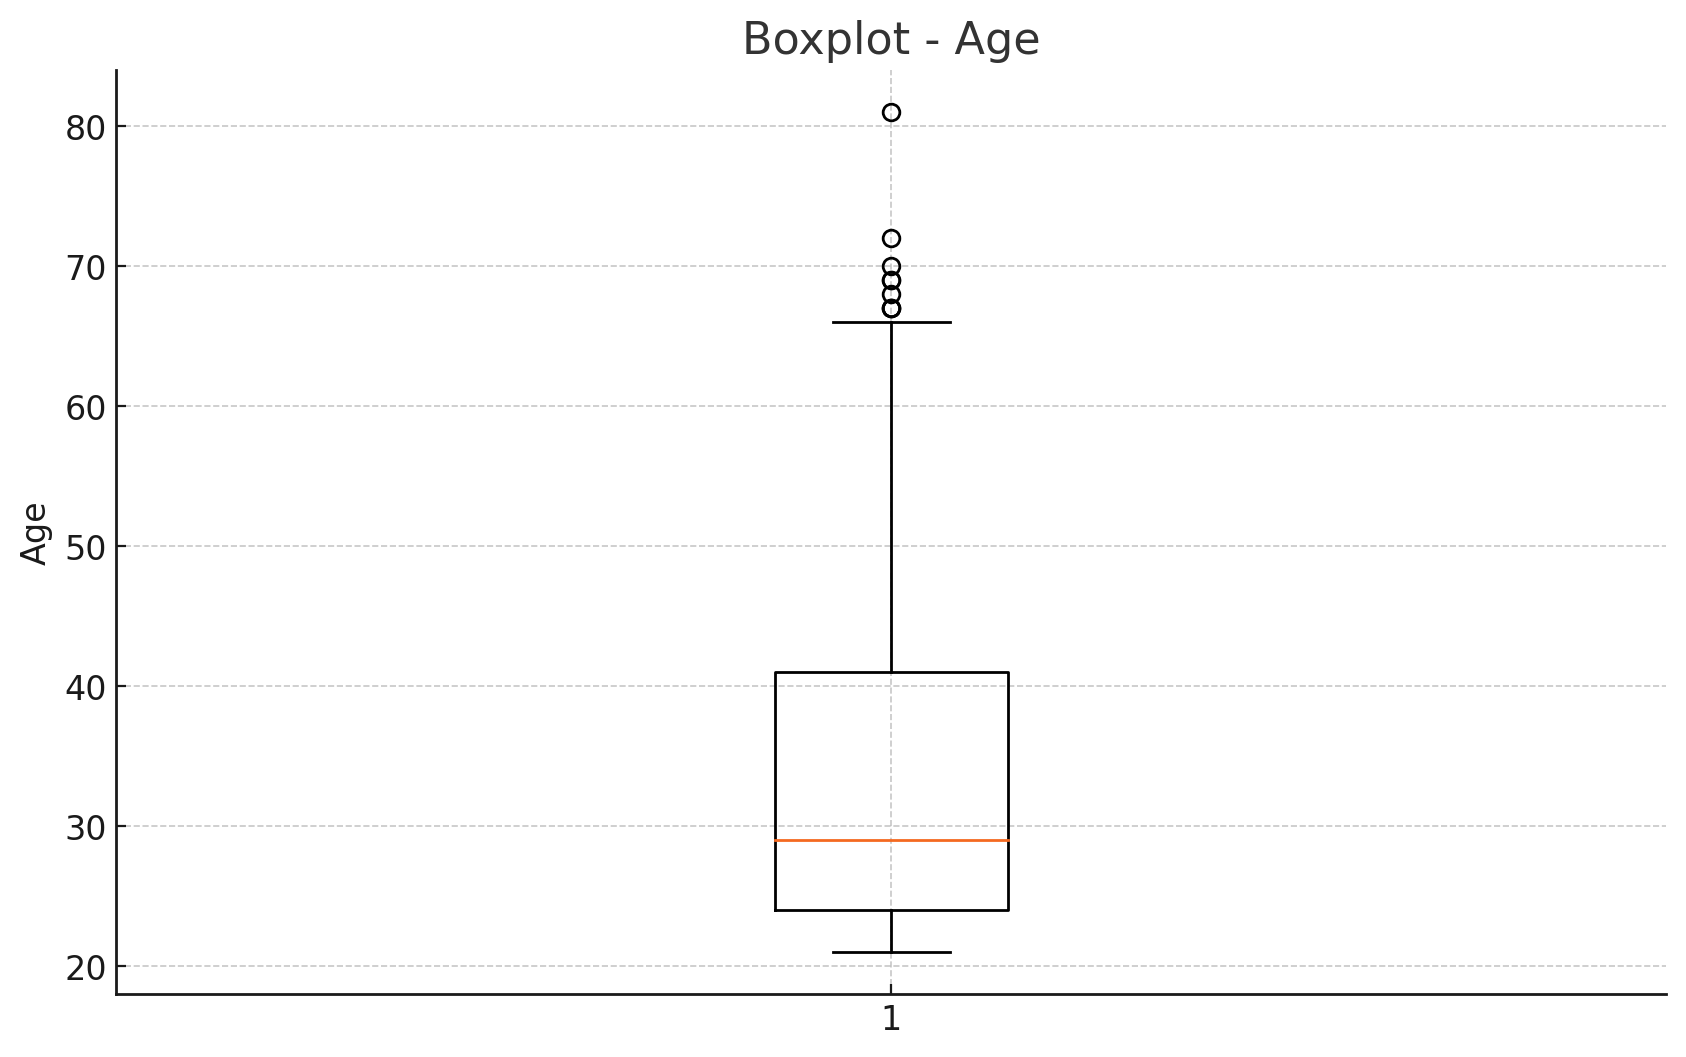

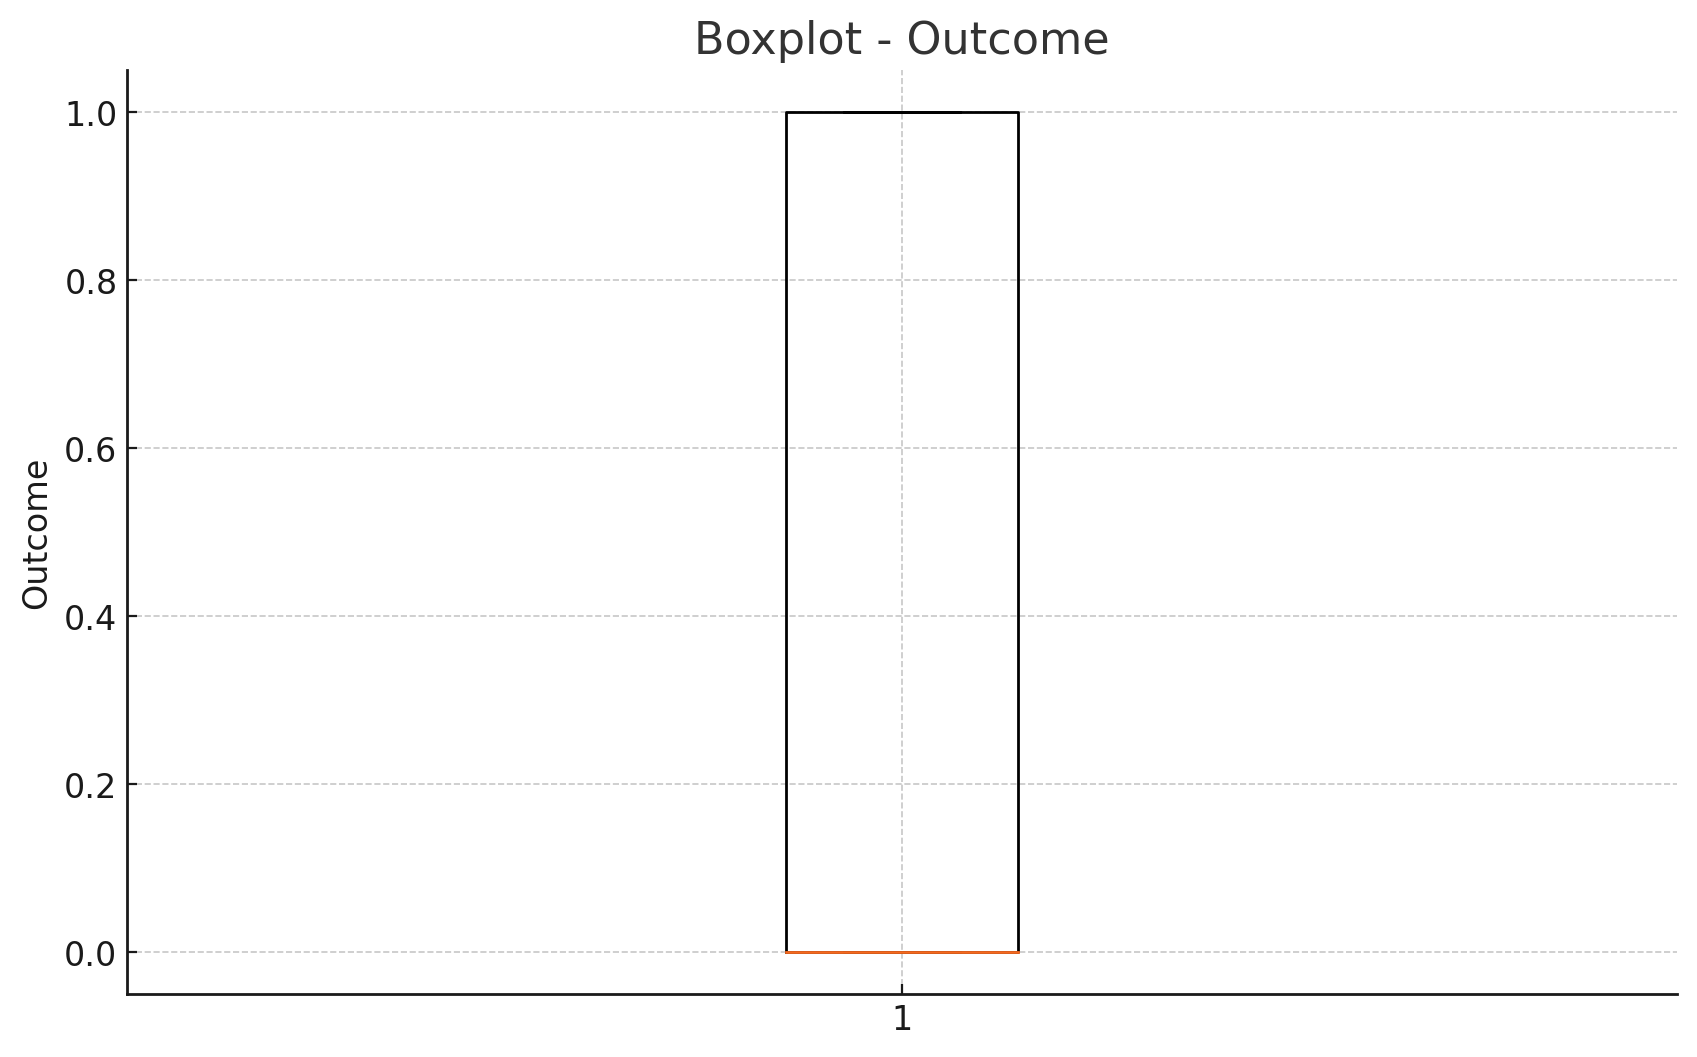

In [3]:
for c in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Histogram - {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()

for c in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Boxplot - {c}")
    plt.ylabel(c)
    plt.show()

### Correlation Heatmap

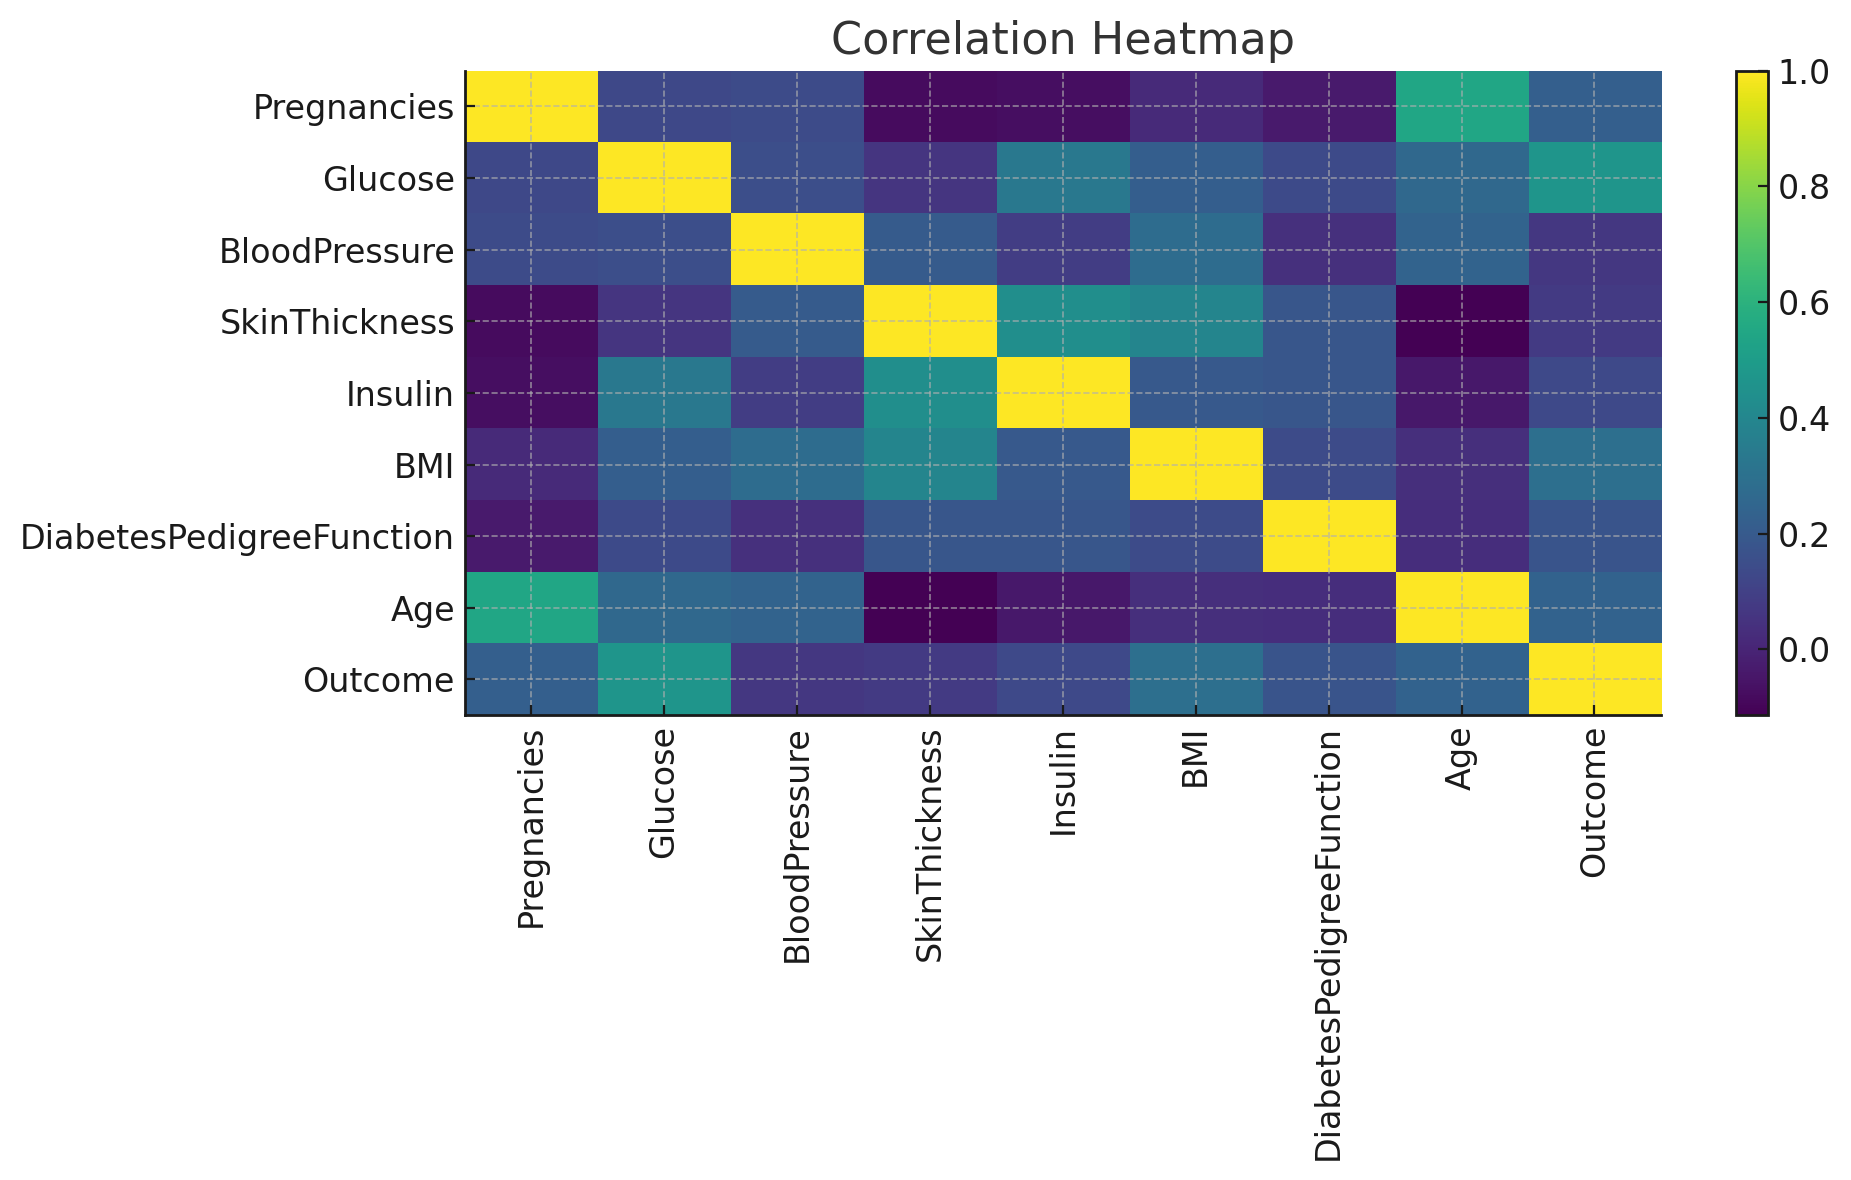

In [4]:
corr = df.corr(numeric_only=True)
plt.figure()
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

In [5]:
import numpy as np
df_clean = df.copy()
candidates = []
for c in df.columns:
    if c != 'Outcome' and df[c].min() == 0 and c.lower() not in ['pregnancies']:
        candidates.append(c)
for c in candidates:
    df_clean.loc[df_clean[c] == 0, c] = np.nan
df_clean.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## 3–4. Model Building & Evaluation

Accuracy : 0.6948051948051948
Precision: 0.574468085106383
Recall   : 0.5
F1-score : 0.5346534653465347
ROC-AUC  : 0.8127777777777777


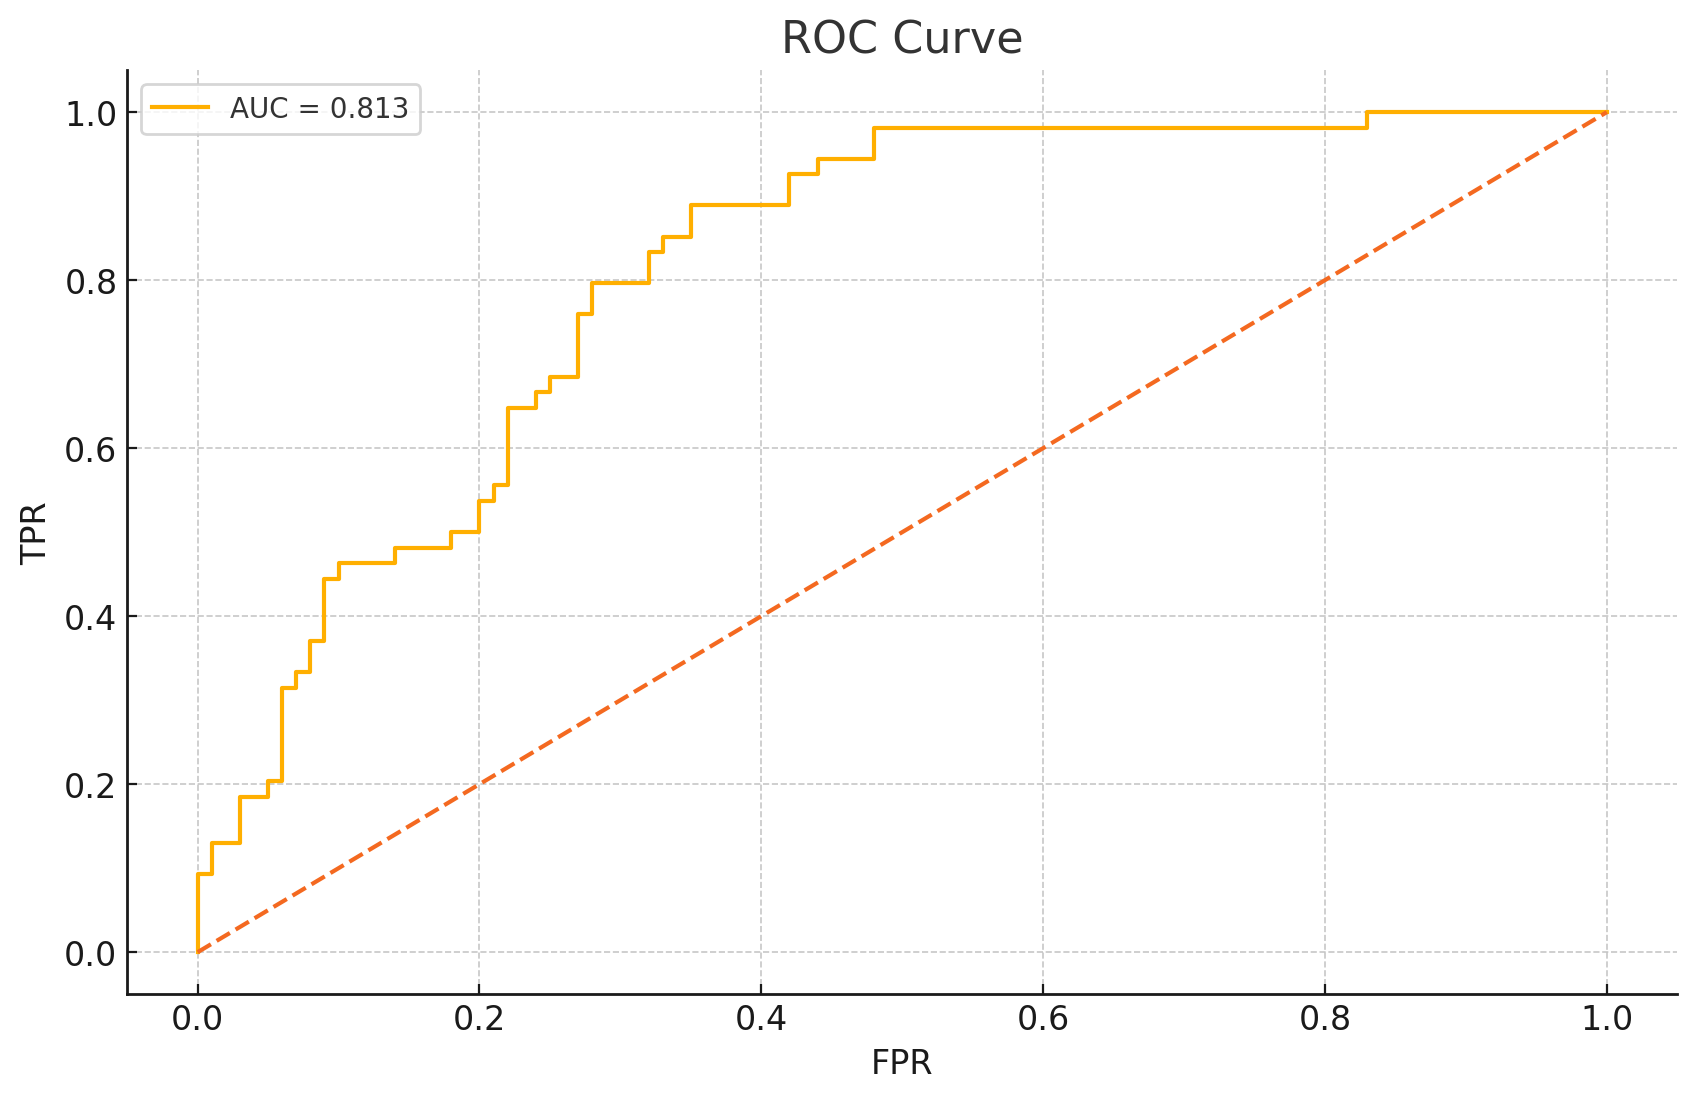

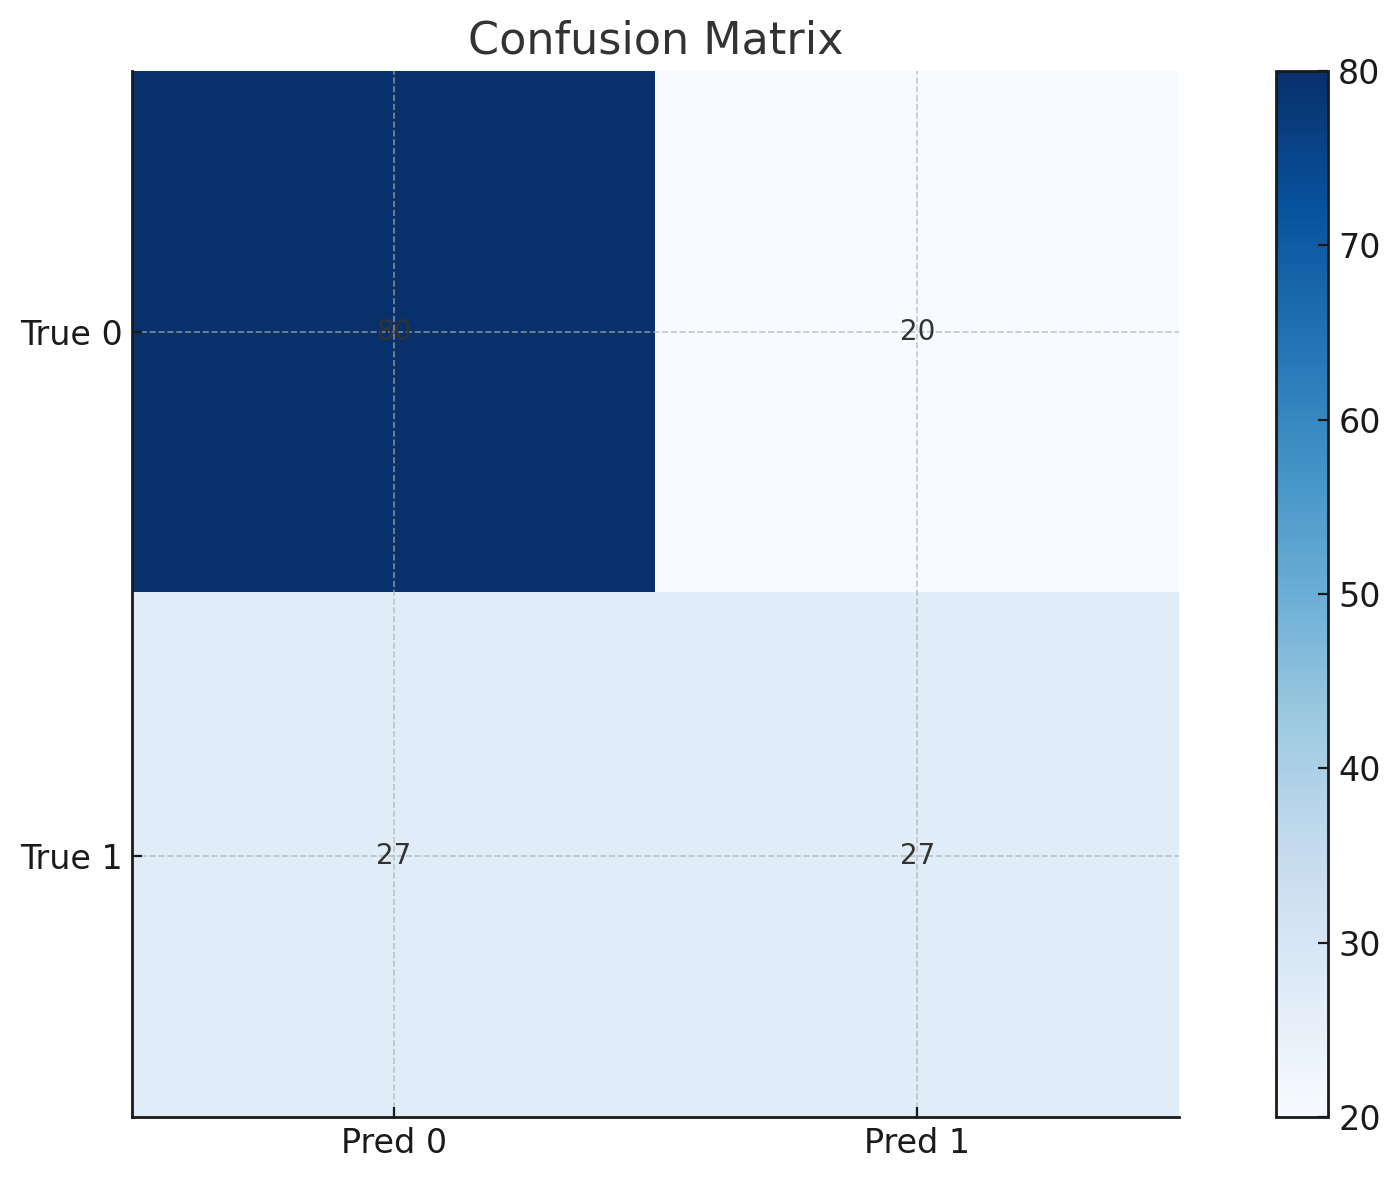

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

X = df_clean.drop(columns=['Outcome'])
y = df_clean['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, solver="liblinear"))
])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_proba)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("ROC-AUC  :", roc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(); plt.plot(fpr, tpr, label=f"AUC = {roc:.3f}")
plt.plot([0,1],[0,1],'--'); plt.legend(); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(); plt.imshow(cm, cmap='Blues'); plt.title("Confusion Matrix"); plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xticks([0,1], ['Pred 0','Pred 1']); plt.yticks([0,1], ['True 0','True 1']); plt.tight_layout(); plt.show()

print(classification_report(y_test, y_pred, zero_division=0))

## 5. Interpretation of Coefficients

In [7]:
coef = pipe.named_steps['logreg'].coef_[0]
feature_names = X.columns.tolist()
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coef})
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df.sort_values("abs_coef", ascending=False)

,feature,coefficient,abs_coef
1,Glucose,1.180669,1.180669
5,BMI,0.687163,0.687163
0,Pregnancies,0.376479,0.376479
6,DiabetesPedigreeFunction,0.233145,0.233145
7,Age,0.147296,0.147296
4,Insulin,-0.066132,0.066132
2,BloodPressure,-0.044031,0.044031
3,SkinThickness,0.027398,0.027398


## 6. Deployment with Streamlit (App Script + Model File)

In [8]:
import joblib
joblib.dump(pipe, r"/mnt/data/Assignment 8.pkl")
"/mnt/data/Assignment 8.pkl" 

'/mnt/data/Assignment 8.pkl'

### Streamlit App Instructions

1. Download `diabetes_logreg_pipeline.pkl` and `streamlit_app.py`.

2. Install Streamlit: `pip install streamlit joblib scikit-learn pandas numpy`

3. Run locally: `streamlit run streamlit_app.py`

4. For online deployment, push both files to a public GitHub repo and deploy via Streamlit Community Cloud (see docs).